**Objectif: Ce projet vise d'effectuer une sorte d'exploration sur les différents profils accidents routiére sujet rapport de police an 2019 à Montréal**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib as plt
import statsmodels.robust as rb
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as sts
import math
from sklearn.decomposition import PCA
import plotnine as p9
import seaborn as sns
from statistics import mode
import random

## 1 - Lecture des données (À l'aide de la librairie Pandas, lire le fichier de données rapport-accident-2019.csv)

In [2]:
accident2019_province_Quebec =  pd.read_csv('rapports-accident-2019.csv',index_col = [0])
accident2019_province_Quebec.head(10)


,NO_SEQ_COLL,DT_ACCDN,HR_ACCDN,JR_SEMN_ACCDN,gravite,NB_MORTS,NB_BLESSES_GRAVES,NB_BLESSES_LEGERS,NB_VICTIMES_TOTAL,NB_VEH_IMPLIQUES_ACCDN,...,nb_tous_autobus_minibus,nb_bicyclette,nb_cyclomoteur,nb_motocyclette,nb_taxi,nb_urgence,nb_motoneige,nb_VHR,nb_autres_types,nb_veh_non_precise
AN,,,,,,,,,,,,,,,,,,,,,
2019,2019 _ 1,2019-07-07,10:00:00-10:59:00,DI,Dommages matériels seulement,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2019,2019 _ 2,2019-10-16,01:00:00-01:59:00,ME,Dommages matériels seulement,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2019,2019 _ 3,2019-01-17,11:00:00-11:59:00,JE,Léger,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
2019,2019 _ 4,2019-11-20,10:00:00-10:59:00,ME,Dommages matériels seulement,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,1
2019,2019 _ 5,2019-12-03,10:00:00-10:59:00,MA,Dommages matériels seulement,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2019,2019 _ 6,2019-10-21,08:00:00-08:59:00,LU,Dommages matériels inférieurs au seuil de rapp...,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2019,2019 _ 7,2019-11-18,11:00:00-11:59:00,LU,Dommages matériels seulement,0,0,0,0,2,...,0,0,0,0,0,1,0,0,0,0
2019,2019 _ 8,2019-08-17,20:00:00-20:59:00,SA,Dommages matériels seulement,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
2019,2019 _ 9,2019-06-20,20:00:00-20:59:00,JE,Dommages matériels inférieurs au seuil de rapp...,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


In [3]:
accident2019_province_Quebec.shape

(134662, 59)

In [4]:
accident2019_province_Quebec['REG_ADM'].unique()


array(['Laval(13)', 'Montérégie(16)', 'Montréal(06)',
       'Abitibi-Témiscamingue(08)', 'Lanaudière(14)',
       'Saguenay/-Lac-Saint-Jean(02)', 'Mauricie(04)', 'Laurentides(15)',
       'Capitale-Nationale(03)', 'Côte-Nord(09)',
       'Chaudière-Appalaches(12)', 'Outaouais(07)', 'Estrie(05)', nan,
       'Centre-du-Québec(17)', 'Bas-Saint-Laurent(01)',
       'Nord-du-Québec(10)', 'Gaspésie/-Îles-de-la-Madeleine(11)'],
      dtype=object)

In [5]:
accident2019_province_Quebec['gravite'].unique()

array(['Dommages matériels seulement', 'Léger',
       'Dommages matériels inférieurs au seuil de rapportage', 'Grave',
       'Mortel'], dtype=object)

In [6]:
accident2019_Montreal= accident2019_province_Quebec[accident2019_province_Quebec.REG_ADM =='Montréal(06)']

accident2019_Montreal.shape


(24896, 59)

In [7]:
accident2019_Montreal = accident2019_Montreal.drop(['DT_ACCDN'],axis=1) # These columns are not useful for our purposes


In [8]:
accident2019_Montreal.shape


(24896, 58)

In [9]:
accident2019_Montreal.columns

Index(['NO_SEQ_COLL', 'HR_ACCDN', 'JR_SEMN_ACCDN', 'gravite', 'NB_MORTS',
       'NB_BLESSES_GRAVES', 'NB_BLESSES_LEGERS', 'NB_VICTIMES_TOTAL',
       'NB_VEH_IMPLIQUES_ACCDN', 'NB_DECES_PIETON', 'NB_BLESSES_PIETON',
       'NB_VICTIMES_PIETON', 'NB_DECES_MOTO', 'NB_BLESSES_MOTO',
       'NB_VICTIMES_MOTO', 'NB_DECES_VELO', 'NB_BLESSES_VELO',
       'NB_VICTIMES_VELO', 'CD_MUNCP', 'REG_ADM', 'MRC', 'NO_CIVIQ_ACCDN',
       'SFX_NO_CIVIQ_ACCDN', 'RUE_ACCDN', 'TP_REPRR_ACCDN', 'ACCDN_PRES_DE',
       'NO_ROUTE', 'CD_PNT_CDRNL_ROUTE', 'BORNE_KM_ACCDN',
       'NB_METRE_DIST_ACCD', 'CD_PNT_CDRNL_REPRR', 'VITESSE_AUTOR',
       'CD_GENRE_ACCDN', 'CD_SIT_PRTCE_ACCDN', 'CD_ETAT_SURFC', 'CD_ECLRM',
       'CD_ENVRN_ACCDN', 'CD_CATEG_ROUTE', 'CD_ETAT_CHASS', 'CD_ASPCT_ROUTE',
       'CD_LOCLN_ACCDN', 'CD_POSI_ACCDN', 'CD_CONFG_ROUTE',
       'CD_ZON_TRAVX_ROUTR', 'CD_COND_METEO', 'nb_automobile_camion_leger',
       'nb_camionLourd_tractRoutier', 'nb_outil_equipement',
       'nb_tous_autobus_m

In [10]:
accident2019_Montreal.head()

,NO_SEQ_COLL,HR_ACCDN,JR_SEMN_ACCDN,gravite,NB_MORTS,NB_BLESSES_GRAVES,NB_BLESSES_LEGERS,NB_VICTIMES_TOTAL,NB_VEH_IMPLIQUES_ACCDN,NB_DECES_PIETON,...,nb_tous_autobus_minibus,nb_bicyclette,nb_cyclomoteur,nb_motocyclette,nb_taxi,nb_urgence,nb_motoneige,nb_VHR,nb_autres_types,nb_veh_non_precise
AN,,,,,,,,,,,,,,,,,,,,,
2019,2019 _ 3,11:00:00-11:59:00,JE,Léger,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2019,2019 _ 4,10:00:00-10:59:00,ME,Dommages matériels seulement,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
2019,2019 _ 5,10:00:00-10:59:00,MA,Dommages matériels seulement,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2019,2019 _ 12,13:00:00-13:59:00,DI,Dommages matériels inférieurs au seuil de rapp...,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2019,2019 _ 13,19:00:00-19:59:00,MA,Dommages matériels seulement,0,0,0,0,2,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
accident2019_Montreal.dtypes.value_counts()

int64      27
float64    20
object     11
dtype: int64

## Apercu sur la nature et le type de differentes colonnes de notre dataset sujet d'exploration (EDA)

## Inventaire rapide sur les types des colonnes 


In [13]:
accident2019_Montreal.describe().T

,count,mean,std,min,25%,50%,75%,max
NB_MORTS,24896.0,0.001366,0.036931,0.0,0.00,0.0,0.00,1.0
NB_BLESSES_GRAVES,24896.0,0.006507,0.092051,0.0,0.00,0.0,0.00,5.0
NB_BLESSES_LEGERS,24896.0,0.255623,0.559933,0.0,0.00,0.0,0.00,8.0
NB_VICTIMES_TOTAL,24896.0,0.263496,0.569897,0.0,0.00,0.0,0.00,8.0
NB_VEH_IMPLIQUES_ACCDN,24896.0,1.960355,0.658831,1.0,2.00,2.0,2.00,14.0
NB_DECES_PIETON,24896.0,0.001085,0.032915,0.0,0.00,0.0,0.00,1.0
NB_BLESSES_PIETON,24896.0,0.046996,0.222911,0.0,0.00,0.0,0.00,7.0
NB_VICTIMES_PIETON,24896.0,0.048080,0.225102,0.0,0.00,0.0,0.00,7.0
NB_DECES_MOTO,24896.0,0.000080,0.008963,0.0,0.00,0.0,0.00,1.0
NB_BLESSES_MOTO,24896.0,0.008194,0.093648,0.0,0.00,0.0,0.00,2.0


In [14]:
print('Constat valeur minimale de Std {0} versus la valeur maximale de Std {1} :'.format(accident2019_Montreal.describe().loc['std'].min(),accident2019_Montreal.describe().loc['std'].max()))

Constat valeur minimale de Std 0.0 versus la valeur maximale de Std 3852.4950553857757 :


## Decision ---> Il faut un mise a l'échelle


In [15]:
# decrire les données non numériques

accident2019_Montreal.select_dtypes(include = 'O').describe().T

,count,unique,top,freq
NO_SEQ_COLL,24896,24896,2019 _ 3,1
HR_ACCDN,24896,25,15:00:00-15:59:00,1881
JR_SEMN_ACCDN,24896,7,VE,4023
gravite,24896,5,Dommages matériels seulement,11721
REG_ADM,24896,1,Montréal(06),24896
MRC,24896,1,Montréal (66 ),24896
SFX_NO_CIVIQ_ACCDN,33,22,A,11
RUE_ACCDN,20929,4255,AUT,526
ACCDN_PRES_DE,17205,5529,FACE,242
CD_PNT_CDRNL_ROUTE,2418,4,E,783


<div class="alert alert-info" >
  <strong><i class="fa fa-chevron-circle-down"></i> Note: </strong> Fonction qui retourne les coefficients de corrélation dépassant un seuil donné
</div>

In [16]:
def correlation(data, threshold = 0.5) :
    correlation = data.corr()
    corre = {'col1' : [], 'col2' : [], 'coef_corr' : []}
    for i in range(correlation.shape[0]): 
        for j in range(i+1, correlation.shape[0]): 
            if correlation.iloc[i,j] >= threshold : 
                corre['col1'].append(correlation.columns.tolist()[i])
                corre['col2'].append(correlation.columns.tolist()[j])
                corre['coef_corr'].append(correlation.iloc[i,j])                
    return pd.DataFrame(corre).sort_values(by = 'coef_corr', ascending = False)

In [17]:
print('Le nombre des descripteurs(colonnes) dans la trame de données brutes est de:',accident2019_Montreal.shape[1])

Le nombre des descripteurs(colonnes) dans la trame de données brutes est de: 58


## Combien d'enregistrements (lignes) ont été fournis?


In [18]:
print('Le nombre des enregistrements (lignes) dans la trame de données brutes est de:', accident2019_Montreal.shape[0])

Le nombre des enregistrements (lignes) dans la trame de données brutes est de: 24896


## Y a-t-il des valeurs manquantes ?

In [19]:
print('Est ce que la trame de données contient des valeurs manquantes ?' , accident2019_Montreal.isnull().values.any())

Est ce que la trame de données contient des valeurs manquantes ? True


In [20]:
def ValeursManquantes(df):
        # Le nombre total des valeurs manquantes
        mis_val = df.isnull().sum()
        
        # Percentage des valeurs manquantes
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # COmbiner le tout dans une table 
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Renommer les colonnes 
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Valeurs manquantes', 1 : '% des Valeurs manquantes'})
        
        # Faire un tri selon le pourcentage des descendant
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% des Valeurs manquantes', ascending=False).round(1)
        
        # Afficher un résumé de la situation
        print ("La trame de données a " + str(df.shape[1]) + " colonnes.\n"      
            "Il y a  " + str(mis_val_table_ren_columns.shape[0]) +
              " colonnes qui ont des valeurs manquantes.")
        
        # sortie une table qui résume le tout d'une facon visuell
        return mis_val_table_ren_columns

In [21]:
ValeursManquantes(accident2019_Montreal).head(26)

La trame de données a 58 colonnes.
Il y a  24 colonnes qui ont des valeurs manquantes.


,Valeurs manquantes,% des Valeurs manquantes
SFX_NO_CIVIQ_ACCDN,24863,99.9
CD_SIT_PRTCE_ACCDN,24407,98.0
CD_ZON_TRAVX_ROUTR,23591,94.8
CD_PNT_CDRNL_ROUTE,22478,90.3
BORNE_KM_ACCDN,21073,84.6
NB_METRE_DIST_ACCD,20358,81.8
NO_ROUTE,19604,78.7
CD_POSI_ACCDN,19145,76.9
CD_ETAT_CHASS,18731,75.2
CD_PNT_CDRNL_REPRR,17960,72.1


** Régle d'affaire décisionnelle : Toutes les lignes des colonnes avec seuil porcentage dépasse 2% ayant une valeur nan doivent etre supprimées. **

In [22]:

cols_supp = ['CD_ETAT_SURFC','CD_GENRE_ACCDN','CD_COND_METEO','CD_CONFG_ROUTE','CD_LOCLN_ACCDN','RUE_ACCDN','VITESSE_AUTOR','ACCDN_PRES_DE','TP_REPRR_ACCDN','NO_CIVIQ_ACCDN','CD_PNT_CDRNL_REPRR','CD_ETAT_CHASS','CD_POSI_ACCDN','NO_ROUTE','NB_METRE_DIST_ACCD','BORNE_KM_ACCDN','CD_PNT_CDRNL_ROUTE','CD_ZON_TRAVX_ROUTR','CD_SIT_PRTCE_ACCDN','SFX_NO_CIVIQ_ACCDN']


import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(20,15)})
import warnings
warnings.simplefilter('ignore')

In [23]:
accident2019_Mtl = accident2019_Montreal.drop(cols_supp,axis =1)


In [24]:
accident2019_Mtl.shape

(24896, 38)

##  Variables numériques continues

In [25]:
# liste des variables numériques
numerical = [var for var in accident2019_Mtl.columns if accident2019_Mtl[var].dtype!='O']
print('Il existe {} variables numériques'.format(len(numerical)))


Il existe 32 variables numériques


## Variables numériques discrètes

Pour identifier les variables discrètes, on sélecyionne parmi toutes les variables numériques, celles qui contiennent un nombre fini et petit de valeurs distinctes. Voir ci-dessous. Visualisons les valeurs des variables discrètes

In [26]:
discrete = []
for var in numerical:
    if len(accident2019_Mtl[var].unique()) < 10:
        print(var, ' values: ', accident2019_Mtl[var].unique())
        discrete.append(var)

NB_MORTS  values:  [0 1]
NB_BLESSES_GRAVES  values:  [0 1 3 2 5]
NB_BLESSES_LEGERS  values:  [1 0 4 2 3 8 6 5]
NB_VICTIMES_TOTAL  values:  [1 0 4 2 3 8 6 5 7]
NB_DECES_PIETON  values:  [0 1]
NB_BLESSES_PIETON  values:  [0 1 2 7 3]
NB_VICTIMES_PIETON  values:  [0 1 2 7 3]
NB_DECES_MOTO  values:  [0 1]
NB_BLESSES_MOTO  values:  [0 1 2]
NB_VICTIMES_MOTO  values:  [0 1 2]
NB_DECES_VELO  values:  [0]
NB_BLESSES_VELO  values:  [0 2 1]
NB_VICTIMES_VELO  values:  [0 2 1]
CD_ECLRM  values:  [ 1.  3.  2. nan  4.]
CD_ENVRN_ACCDN  values:  [ 3.  2.  4.  5. nan  1.  9.  7.  6.]
CD_ASPCT_ROUTE  values:  [11. 12. 21. nan 14. 23. 13. 24. 22.]
nb_camionLourd_tractRoutier  values:  [0 1 2 3]
nb_outil_equipement  values:  [0 1 2]
nb_tous_autobus_minibus  values:  [0 1 2]
nb_bicyclette  values:  [0 2 1]
nb_cyclomoteur  values:  [0 1 2]
nb_motocyclette  values:  [0 1 2 3]
nb_taxi  values:  [0 1 2]
nb_urgence  values:  [0 1 2]
nb_motoneige  values:  [0]
nb_VHR  values:  [0 1]
nb_autres_types  values:  [0 1 

### Variables Catégoriques

In [27]:
# trouver des variables catégorielles et les stocker dans une liste
categorical = [var for var in accident2019_Mtl.columns if accident2019_Mtl[var].dtype=='O' and var not in discrete and var not in ['DT_ACCDN', 'HR_ACCDN', 'JR_SEMN_ACCDN']]
print('Il existe {} variables catégorielles'.format(len(categorical)))

Il existe 4 variables catégorielles


In [28]:
print( 'Les différentes valeurs de chaque catégorie sont données comme suit: \n', accident2019_Mtl[categorical].nunique())

Les différentes valeurs de chaque catégorie sont données comme suit: 
 NO_SEQ_COLL    24896
gravite            5
REG_ADM            1
MRC                1
dtype: int64


In [29]:
accident2019_Mtl.columns

Index(['NO_SEQ_COLL', 'HR_ACCDN', 'JR_SEMN_ACCDN', 'gravite', 'NB_MORTS',
       'NB_BLESSES_GRAVES', 'NB_BLESSES_LEGERS', 'NB_VICTIMES_TOTAL',
       'NB_VEH_IMPLIQUES_ACCDN', 'NB_DECES_PIETON', 'NB_BLESSES_PIETON',
       'NB_VICTIMES_PIETON', 'NB_DECES_MOTO', 'NB_BLESSES_MOTO',
       'NB_VICTIMES_MOTO', 'NB_DECES_VELO', 'NB_BLESSES_VELO',
       'NB_VICTIMES_VELO', 'CD_MUNCP', 'REG_ADM', 'MRC', 'CD_ECLRM',
       'CD_ENVRN_ACCDN', 'CD_CATEG_ROUTE', 'CD_ASPCT_ROUTE',
       'nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier',
       'nb_outil_equipement', 'nb_tous_autobus_minibus', 'nb_bicyclette',
       'nb_cyclomoteur', 'nb_motocyclette', 'nb_taxi', 'nb_urgence',
       'nb_motoneige', 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise'],
      dtype='object')

##  Variables numériques continues

In [30]:
continues = [var for var in numerical if var not in discrete and var not in categorical]
print('Il existe {} variables numériques continues'.format(len(numerical)))

Il existe 32 variables numériques continues


<br/><br/>
# Étape 2 : Nettoyage des données

Dans cette étape, on s’intéresse à implémenter les correctifs soulignés dans l’étape 1.
De ce fait, il serait important de considérer les opérations suivantes :
- Traiter les valeurs manquantes
- Encodage catégoriel (OneHotEncodign et LabelEncoding)
- Mise à l'échelle des fonctionnalités numériques

##  Supprimer les lignes ayant des valeurs NaN

##  Calcul indice de qualité (Degré d'amplitude)

In [31]:
"Calcul du degré de complitude pour l'ensemble du jeu données global"

NR = accident2019_Mtl.shape[0]

Nnan = accident2019_Mtl.isnull().sum()
DegCompletude = 1 - (Nnan/NR)


DegCompletude

NO_SEQ_COLL                    1.000000
HR_ACCDN                       1.000000
JR_SEMN_ACCDN                  1.000000
gravite                        1.000000
NB_MORTS                       1.000000
NB_BLESSES_GRAVES              1.000000
NB_BLESSES_LEGERS              1.000000
NB_VICTIMES_TOTAL              1.000000
NB_VEH_IMPLIQUES_ACCDN         1.000000
NB_DECES_PIETON                1.000000
NB_BLESSES_PIETON              1.000000
NB_VICTIMES_PIETON             1.000000
NB_DECES_MOTO                  1.000000
NB_BLESSES_MOTO                1.000000
NB_VICTIMES_MOTO               1.000000
NB_DECES_VELO                  1.000000
NB_BLESSES_VELO                1.000000
NB_VICTIMES_VELO               1.000000
CD_MUNCP                       1.000000
REG_ADM                        1.000000
MRC                            1.000000
CD_ECLRM                       0.974132
CD_ENVRN_ACCDN                 0.980358
CD_CATEG_ROUTE                 0.985620
CD_ASPCT_ROUTE                 0.979113



## Decision (Degré de Completude supérieur à 0.97) ---> On peut supprimer les valeurs NaN


In [32]:
accident2019_Mtl =accident2019_Mtl.dropna()

## Aprés supprission des observations avec valeurs manquantes

In [33]:
accident2019_Mtl.shape


(23736, 38)

In [34]:
print('Est ce que la nouvelle trame de données traitée contient des valeurs manquantes ? La réponses est --> ' , accident2019_Mtl.isnull().values.any())


Est ce que la nouvelle trame de données traitée contient des valeurs manquantes ? La réponses est -->  False


<div class="alert alert-info" >
  <strong><i class="fa fa-chevron-circle-down"></i> Note: </strong> Fonction de recherche les colonnes catégorielle avec une classe unique
</div>

In [35]:
def columns_with_unique_value(data) :
    list_columns = []
    d = data.dropna().select_dtypes(include = 'O')
    for c in d.columns.tolist() :
        if d[c].unique().shape[0] == 1 :
            list_columns.append(c)
    return list_columns

In [36]:
columns_with_unique_value(accident2019_Mtl)

['REG_ADM', 'MRC']

In [37]:
accident2019_Mtl = accident2019_Mtl[accident2019_Mtl.HR_ACCDN != 'Non précisé']

In [38]:
accident2019_Mtl.shape


(23250, 38)

In [39]:
Start_HR_ACCDN = accident2019_Mtl.HR_ACCDN.str.split("-",expand=True,)

In [41]:
Start_HR_ACCDN
accident2019_Mtl['Start_HR_ACCDN_time']= pd.to_datetime(Start_HR_ACCDN[0]).dt.hour

In [42]:
accident2019_Mtl['Start_HR_ACCDN_time']
accident2019_Mtl.shape

(23250, 39)

In [43]:
def convertHourToPeriode(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'
accident2019_Mtl['PERIODE_HR_ACCDN_time'] = accident2019_Mtl['Start_HR_ACCDN_time'].apply(convertHourToPeriode)

In [44]:
accident2019_Mtl.shape

(23250, 40)

In [46]:
accident2019_Mtl.shape

(23250, 40)

In [47]:
accident2019_Mtl.head(10)

,NO_SEQ_COLL,HR_ACCDN,JR_SEMN_ACCDN,gravite,NB_MORTS,NB_BLESSES_GRAVES,NB_BLESSES_LEGERS,NB_VICTIMES_TOTAL,NB_VEH_IMPLIQUES_ACCDN,NB_DECES_PIETON,...,nb_cyclomoteur,nb_motocyclette,nb_taxi,nb_urgence,nb_motoneige,nb_VHR,nb_autres_types,nb_veh_non_precise,Start_HR_ACCDN_time,PERIODE_HR_ACCDN_time
AN,,,,,,,,,,,,,,,,,,,,,
2019,2019 _ 3,11:00:00-11:59:00,JE,Léger,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,11,Morning
2019,2019 _ 4,10:00:00-10:59:00,ME,Dommages matériels seulement,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,10,Morning
2019,2019 _ 5,10:00:00-10:59:00,MA,Dommages matériels seulement,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,10,Morning
2019,2019 _ 12,13:00:00-13:59:00,DI,Dommages matériels inférieurs au seuil de rapp...,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,13,Noon
2019,2019 _ 13,19:00:00-19:59:00,MA,Dommages matériels seulement,0,0,0,0,2,0,...,0,0,0,1,0,0,0,0,19,Evening
2019,2019 _ 16,08:00:00-08:59:00,VE,Dommages matériels seulement,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,8,Early Morning
2019,2019 _ 17,08:00:00-08:59:00,MA,Dommages matériels inférieurs au seuil de rapp...,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,8,Early Morning
2019,2019 _ 18,13:00:00-13:59:00,VE,Dommages matériels seulement,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,13,Noon
2019,2019 _ 19,05:00:00-05:59:00,SA,Dommages matériels seulement,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,5,Early Morning


In [48]:
def convertJourToPeroideSemiane(x):
   
    if  x in ['SA','DI']:
        return'Fin de semaine'
    
    else :
        return'Au cours de la semain'
    
accident2019_Mtl['PERIODE_Semaine_ACCDN'] = accident2019_Mtl['JR_SEMN_ACCDN'].apply(convertJourToPeroideSemiane)

accident2019_Mtl['PERIODE_Semaine_ACCDN']


AN
2019    Au cours de la semain
2019    Au cours de la semain
2019    Au cours de la semain
2019           Fin de semaine
2019    Au cours de la semain
                ...          
2019           Fin de semaine
2019    Au cours de la semain
2019    Au cours de la semain
2019    Au cours de la semain
2019    Au cours de la semain
Name: PERIODE_Semaine_ACCDN, Length: 23250, dtype: object

In [49]:
accident2019_Mtl.pop('HR_ACCDN')
accident2019_Mtl.pop('NO_SEQ_COLL')


AN
2019         2019 _ 3
2019         2019 _ 4
2019         2019 _ 5
2019        2019 _ 12
2019        2019 _ 13
            ...      
2019    2019 _ 134647
2019    2019 _ 134648
2019    2019 _ 134649
2019    2019 _ 134655
2019    2019 _ 134661
Name: NO_SEQ_COLL, Length: 23250, dtype: object

In [50]:
accident2019_Mtl.shape

(23250, 39)

In [51]:
accident2019_Mtl.columns

Index(['JR_SEMN_ACCDN', 'gravite', 'NB_MORTS', 'NB_BLESSES_GRAVES',
       'NB_BLESSES_LEGERS', 'NB_VICTIMES_TOTAL', 'NB_VEH_IMPLIQUES_ACCDN',
       'NB_DECES_PIETON', 'NB_BLESSES_PIETON', 'NB_VICTIMES_PIETON',
       'NB_DECES_MOTO', 'NB_BLESSES_MOTO', 'NB_VICTIMES_MOTO', 'NB_DECES_VELO',
       'NB_BLESSES_VELO', 'NB_VICTIMES_VELO', 'CD_MUNCP', 'REG_ADM', 'MRC',
       'CD_ECLRM', 'CD_ENVRN_ACCDN', 'CD_CATEG_ROUTE', 'CD_ASPCT_ROUTE',
       'nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier',
       'nb_outil_equipement', 'nb_tous_autobus_minibus', 'nb_bicyclette',
       'nb_cyclomoteur', 'nb_motocyclette', 'nb_taxi', 'nb_urgence',
       'nb_motoneige', 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise',
       'Start_HR_ACCDN_time', 'PERIODE_HR_ACCDN_time',
       'PERIODE_Semaine_ACCDN'],
      dtype='object')

In [52]:
accident2019_Mtl.head(10)

,JR_SEMN_ACCDN,gravite,NB_MORTS,NB_BLESSES_GRAVES,NB_BLESSES_LEGERS,NB_VICTIMES_TOTAL,NB_VEH_IMPLIQUES_ACCDN,NB_DECES_PIETON,NB_BLESSES_PIETON,NB_VICTIMES_PIETON,...,nb_motocyclette,nb_taxi,nb_urgence,nb_motoneige,nb_VHR,nb_autres_types,nb_veh_non_precise,Start_HR_ACCDN_time,PERIODE_HR_ACCDN_time,PERIODE_Semaine_ACCDN
AN,,,,,,,,,,,,,,,,,,,,,
2019,JE,Léger,0,0,1,1,2,0,0,0,...,0,0,0,0,0,0,0,11,Morning,Au cours de la semain
2019,ME,Dommages matériels seulement,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,1,10,Morning,Au cours de la semain
2019,MA,Dommages matériels seulement,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,10,Morning,Au cours de la semain
2019,DI,Dommages matériels inférieurs au seuil de rapp...,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,13,Noon,Fin de semaine
2019,MA,Dommages matériels seulement,0,0,0,0,2,0,0,0,...,0,0,1,0,0,0,0,19,Evening,Au cours de la semain
2019,VE,Dommages matériels seulement,0,0,0,0,2,0,0,0,...,0,0,0,0,0,1,0,8,Early Morning,Au cours de la semain
2019,MA,Dommages matériels inférieurs au seuil de rapp...,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,8,Early Morning,Au cours de la semain
2019,VE,Dommages matériels seulement,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,13,Noon,Au cours de la semain
2019,SA,Dommages matériels seulement,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,5,Early Morning,Fin de semaine


In [53]:
from datetime import date, datetime
def season_of_date(date):
    year = str(date.dt.year)
    seasons = {'spring': pd.date_range(start='21/03/'+year, end='20-06-'+year),
               'summer': pd.date_range(start='21/06/'+year, end='22-09-'+year),
               'autumn': pd.date_range(start='23/09/'+year, end='20/12/'+year)}
    if date in seasons['spring']:
        return 'spring'
    if date in seasons['summer']:
        return 'summer'
    if date in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [54]:
accident2019_Mtl_Léger = accident2019_Mtl[accident2019_Mtl.gravite == 'Léger']
accident2019_Mtl_Dommages_mat_seul = accident2019_Mtl[accident2019_Mtl.gravite == 'Dommages matériels seulement']
accident2019_Mtl_Dommages_matériels_inf_seuil_rapportage = accident2019_Mtl[accident2019_Mtl.gravite == "Dommages matériels inférieurs au seuil de rapportage"]
accident2019_Mtl_Grave = accident2019_Mtl[accident2019_Mtl.gravite == 'Grave']
accident2019_Mtl_Mortel = accident2019_Mtl[accident2019_Mtl.gravite == 'Mortel']

In [55]:
a = accident2019_Mtl_Léger.shape[0]
b = accident2019_Mtl_Dommages_mat_seul.shape[0]
c =accident2019_Mtl_Dommages_matériels_inf_seuil_rapportage.shape[0]
d = accident2019_Mtl_Grave.shape[0]
e = accident2019_Mtl_Mortel.shape[0]

print ('Le nombre des observations des accidents de type léger',a)
print ('Le nombre des observations des accidents avec Dommages_mat_seul',b)
print ('Le nombre des observations des accidents avec Dommages_matériels_inf_seuil_rapportage',c)
print ('Le nombre des observations des accidents considérés grave',d)
print ('Le nombre des observations des accidents considérés mortel',e)

Le nombre des observations des accidents de type léger 5033
Le nombre des observations des accidents avec Dommages_mat_seul 10978
Le nombre des observations des accidents avec Dommages_matériels_inf_seuil_rapportage 7068
Le nombre des observations des accidents considérés grave 140
Le nombre des observations des accidents considérés mortel 31


In [56]:

def echantillonnage(data, nb_smaple = 10):
    return data.sample(nb_smaple)

#random_Léger = np.random.choice(a,size = int(a), replace=False)


def DataSampleToSimulate(nb_sampleA,nb_sampleB,nb_sampleC,nb_sampleD,nb_sampleE):
   
    accident2019_Mtl_Léger_sample = echantillonnage(accident2019_Mtl_Léger,nb_sampleA)
    aa = accident2019_Mtl_Léger_sample.shape[0]
    print ('Le nombre des observations des accidents de type léger aprés échantillonnage',nb_sampleA)

    accident2019_Mtl_Dommages_mat_seul_sample = echantillonnage(accident2019_Mtl_Dommages_mat_seul,nb_sampleB)
    bb = accident2019_Mtl_Dommages_mat_seul_sample.shape[0]
    print ('Le nombre des observations des accidents avec Dommages_mat_seul',nb_sampleB)
    
     
    accident2019_Mtl_Dommages_matériels_inf_seuil_rapportage_sample = echantillonnage(accident2019_Mtl_Dommages_matériels_inf_seuil_rapportage,nb_sampleC)
    cc = accident2019_Mtl_Dommages_matériels_inf_seuil_rapportage_sample.shape[0]
    print ('Le nombre des observations des accidents avec Dommages_matériels_inf_seuil_rapportage',nb_sampleC)

    accident2019_Mtl_Grave_sample = echantillonnage(accident2019_Mtl_Grave,nb_sampleD)
    dd = accident2019_Mtl_Grave_sample.shape[0]
    print ('Le nombre des observations des accidents considérés grave',nb_sampleD)

    accident2019_Mtl_Mortel_sample = echantillonnage(accident2019_Mtl_Mortel,nb_sampleE)
    ee = accident2019_Mtl_Mortel_sample.shape[0]
    print ('Le nombre des observations des accidents considérés mortels',nb_sampleE)
    return [accident2019_Mtl_Léger_sample,accident2019_Mtl_Dommages_mat_seul_sample,accident2019_Mtl_Mortel_sample,accident2019_Mtl_Grave_sample,accident2019_Mtl_Dommages_matériels_inf_seuil_rapportage_sample]

In [57]:
accident2019_Mtl_sample_all_Data = pd.concat(DataSampleToSimulate(a,b,c,d,e))


Le nombre des observations des accidents de type léger aprés échantillonnage 5033
Le nombre des observations des accidents avec Dommages_mat_seul 10978
Le nombre des observations des accidents avec Dommages_matériels_inf_seuil_rapportage 7068
Le nombre des observations des accidents considérés grave 140
Le nombre des observations des accidents considérés mortels 31


In [58]:
accident2019_Mtl_sample_all_Data.shape

(23250, 39)

## Cherchons maintenant des clusters par la méthodes des k-moyennes

### A- Simulation avec la totalité de la trame des données 

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.cluster import KMeans
X = pd.get_dummies(accident2019_Mtl_sample_all_Data)
X = scaler.fit_transform(X)
historique_distortion = []
historique_labels_count = []


for k in range(1,10):
    kmeans = KMeans(n_clusters=k, n_init = 100).fit(X)
    historique_distortion.append(kmeans.inertia_)
    historique_labels_count.append(k)

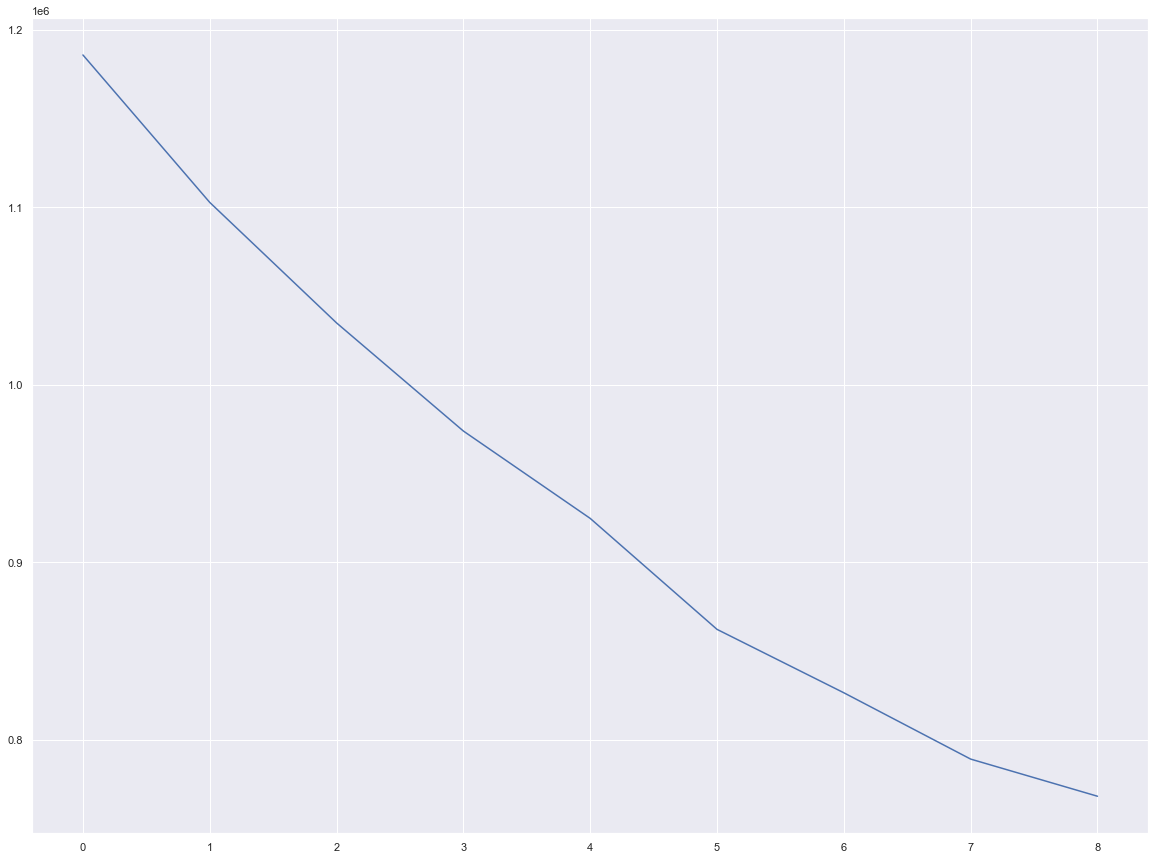

In [60]:
import matplotlib.pyplot as plt
plt.plot(historique_distortion)

In [61]:
for i,j in zip(historique_labels_count,historique_distortion):
    print('Avec  {} cluster  on détecte une distortion de {} '.format(i,j))

Avec  1 cluster  on détecte une distortion de 1185750.0000000133 
Avec  2 cluster  on détecte une distortion de 1102720.9644950556 
Avec  3 cluster  on détecte une distortion de 1034846.7482070507 
Avec  4 cluster  on détecte une distortion de 973956.1923027218 
Avec  5 cluster  on détecte une distortion de 924763.6511935887 
Avec  6 cluster  on détecte une distortion de 862266.236667803 
Avec  7 cluster  on détecte une distortion de 826556.2301293436 
Avec  8 cluster  on détecte une distortion de 789209.1692504878 
Avec  9 cluster  on détecte une distortion de 768289.8455664116 


### B- Simulation avec lune partie de la trame des données  (150 échantillon, nb_sample_nu_type = 30)

In [62]:
accident2019_Mtl_30_samples_each_type_gravite = pd.concat(DataSampleToSimulate(30,30,30,30,30))

Le nombre des observations des accidents de type léger aprés échantillonnage 30
Le nombre des observations des accidents avec Dommages_mat_seul 30
Le nombre des observations des accidents avec Dommages_matériels_inf_seuil_rapportage 30
Le nombre des observations des accidents considérés grave 30
Le nombre des observations des accidents considérés mortels 30


In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.cluster import KMeans
X = pd.get_dummies(accident2019_Mtl_30_samples_each_type_gravite)
#accident2019_Montreal2_sample_dummies = pd.get_dummies(accident2019_Montreal2_sample)
X = scaler.fit_transform(X)
historique_distortion = []
historique_labels_count = []


for k in range(1,30):
    kmeans = KMeans(n_clusters=k, n_init = 100).fit(X)
    #kmeans = KMeans(n_clusters=f, init='kmeans++').fit(accident2019_Montreal2)
    historique_distortion.append(kmeans.inertia_)
    historique_labels_count.append(k)

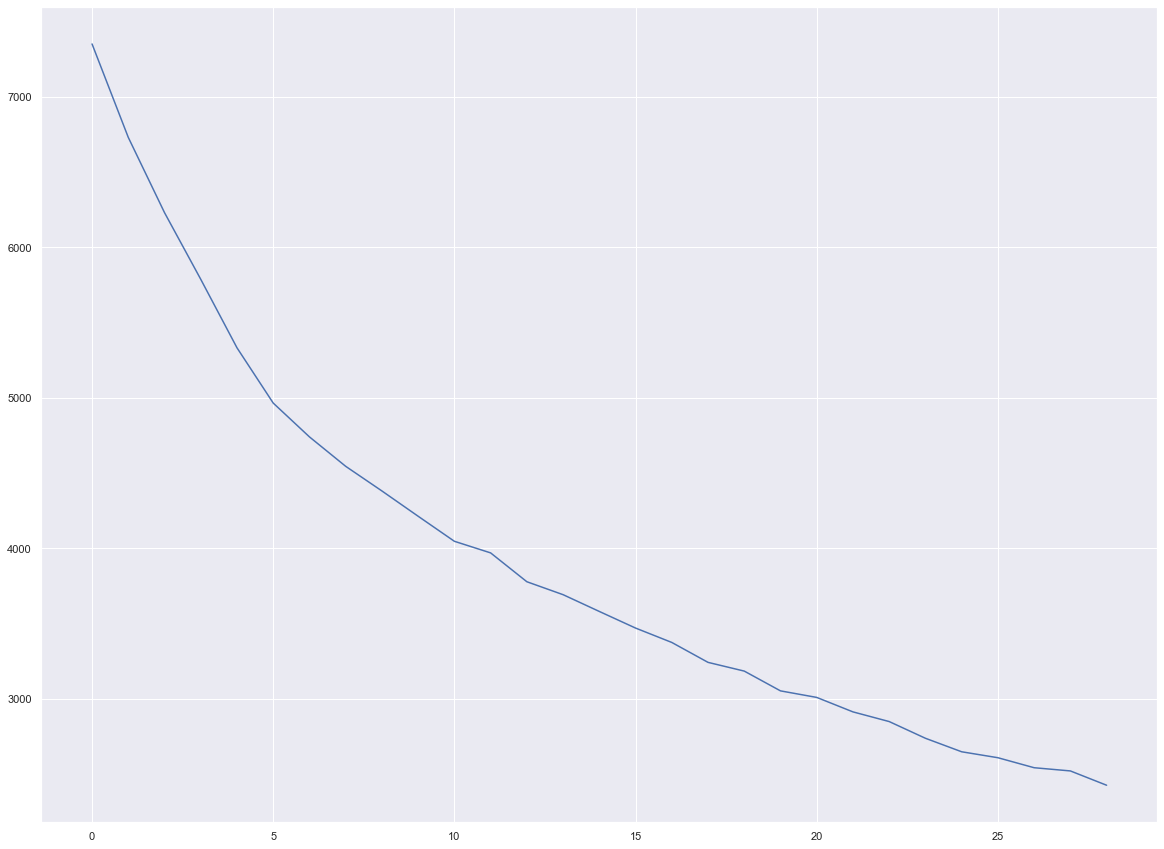

In [64]:
import matplotlib.pyplot as plt
plt.plot(historique_distortion)

In [65]:
for i,j in zip(historique_labels_count,historique_distortion):
    print('Avec  {} cluster  on détecte une distortion de {} '.format(i,j))

Avec  1 cluster  on détecte une distortion de 7350.000000000002 
Avec  2 cluster  on détecte une distortion de 6729.567522369142 
Avec  3 cluster  on détecte une distortion de 6229.9266805124125 
Avec  4 cluster  on détecte une distortion de 5787.301748660894 
Avec  5 cluster  on détecte une distortion de 5332.488771842466 
Avec  6 cluster  on détecte une distortion de 4965.469724689939 
Avec  7 cluster  on détecte une distortion de 4740.956205357185 
Avec  8 cluster  on détecte une distortion de 4545.554672818666 
Avec  9 cluster  on détecte une distortion de 4381.91612229135 
Avec  10 cluster  on détecte une distortion de 4214.003564168367 
Avec  11 cluster  on détecte une distortion de 4047.6998431509096 
Avec  12 cluster  on détecte une distortion de 3970.6717258995013 
Avec  13 cluster  on détecte une distortion de 3779.1614902480305 
Avec  14 cluster  on détecte une distortion de 3693.2328732119013 
Avec  15 cluster  on détecte une distortion de 3581.831760646579 
Avec  16 cluste

## Approche supervisé séparation des étiquettes (label_gravite) au reste des données

In [66]:
label_gravite = accident2019_Mtl_30_samples_each_type_gravite['gravite']

accident2019_Mtl_30_samples_each_type_gravite = accident2019_Mtl_30_samples_each_type_gravite.drop('gravite',1)

### B-1 Sans étiquette

## Implementing Agglomerative Clustering with scikit-learn

In [67]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from helpers import plot_dendrogram

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.cluster import KMeans
X = pd.get_dummies(accident2019_Mtl_30_samples_each_type_gravite)
#accident2019_Montreal2_sample_dummies = pd.get_dummies(accident2019_Montreal2_sample)
X = scaler.fit_transform(X)
historique_distortion = []
historique_labels_count = []


for k in range(1,10):
    kmeans = KMeans(n_clusters=k, n_init = 100).fit(X)
    #kmeans = KMeans(n_clusters=f, init='kmeans++').fit(accident2019_Montreal2)
    historique_distortion.append(kmeans.inertia_)
    historique_labels_count.append(k)

In [69]:
cluster_single = AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage='single').fit(X)

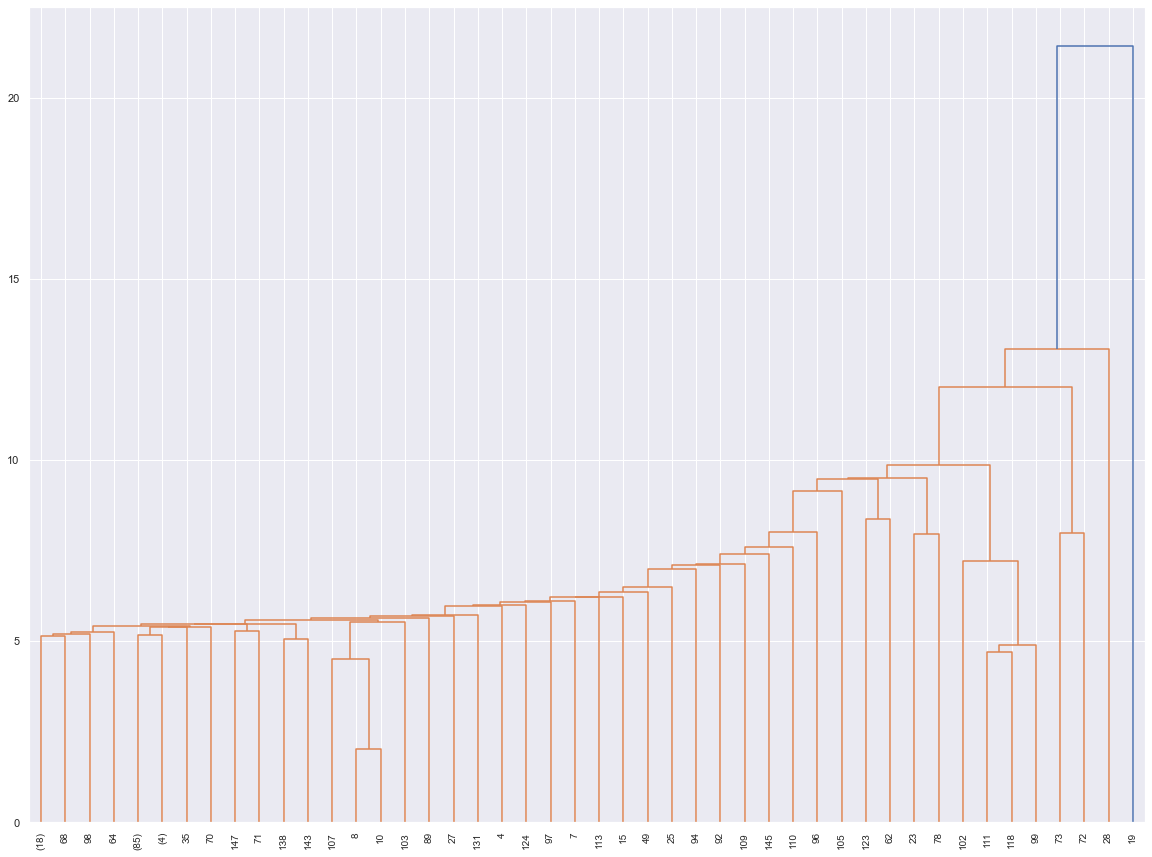

In [70]:
plot_dendrogram(cluster_single, truncate_mode = 'level',leaf_font_size=10)

In [78]:
étiquette_73  = label_gravite.iloc[73]
étiquette_73


'Mortel'

In [89]:
periode_semiane_73 = accident2019_Mtl_30_samples_each_type_gravite.iloc[73]
periode_semiane_73

JR_SEMN_ACCDN                                     VE
NB_MORTS                                           1
NB_BLESSES_GRAVES                                  0
NB_BLESSES_LEGERS                                  2
NB_VICTIMES_TOTAL                                  3
NB_VEH_IMPLIQUES_ACCDN                             2
NB_DECES_PIETON                                    0
NB_BLESSES_PIETON                                  0
NB_VICTIMES_PIETON                                 0
NB_DECES_MOTO                                      1
NB_BLESSES_MOTO                                    0
NB_VICTIMES_MOTO                                   1
NB_DECES_VELO                                      0
NB_BLESSES_VELO                                    0
NB_VICTIMES_VELO                                   0
CD_MUNCP                                     66023.0
REG_ADM                                 Montréal(06)
MRC                                   Montréal (66 )
CD_ECLRM                                      

In [80]:
étiquette_72  = label_gravite.iloc[72]
étiquette_72

'Mortel'

In [90]:
periode_semiane_72 = accident2019_Mtl_30_samples_each_type_gravite.iloc[72]
periode_semiane_72

JR_SEMN_ACCDN                                     VE
NB_MORTS                                           1
NB_BLESSES_GRAVES                                  0
NB_BLESSES_LEGERS                                  0
NB_VICTIMES_TOTAL                                  1
NB_VEH_IMPLIQUES_ACCDN                             1
NB_DECES_PIETON                                    0
NB_BLESSES_PIETON                                  0
NB_VICTIMES_PIETON                                 0
NB_DECES_MOTO                                      1
NB_BLESSES_MOTO                                    0
NB_VICTIMES_MOTO                                   1
NB_DECES_VELO                                      0
NB_BLESSES_VELO                                    0
NB_VICTIMES_VELO                                   0
CD_MUNCP                                     66087.0
REG_ADM                                 Montréal(06)
MRC                                   Montréal (66 )
CD_ECLRM                                      

In [81]:
étiquette_111  = label_gravite.iloc[111]
étiquette_111

'Grave'

In [91]:
periode_semiane_111 = accident2019_Mtl_30_samples_each_type_gravite.iloc[111]
periode_semiane_111

JR_SEMN_ACCDN                                     MA
NB_MORTS                                           0
NB_BLESSES_GRAVES                                  1
NB_BLESSES_LEGERS                                  0
NB_VICTIMES_TOTAL                                  1
NB_VEH_IMPLIQUES_ACCDN                             2
NB_DECES_PIETON                                    0
NB_BLESSES_PIETON                                  0
NB_VICTIMES_PIETON                                 0
NB_DECES_MOTO                                      0
NB_BLESSES_MOTO                                    1
NB_VICTIMES_MOTO                                   1
NB_DECES_VELO                                      0
NB_BLESSES_VELO                                    0
NB_VICTIMES_VELO                                   0
CD_MUNCP                                     66023.0
REG_ADM                                 Montréal(06)
MRC                                   Montréal (66 )
CD_ECLRM                                      

In [82]:
étiquette_118  = label_gravite.iloc[118]
étiquette_118

'Grave'

In [92]:
periode_semiane_118 = accident2019_Mtl_30_samples_each_type_gravite.iloc[118]
periode_semiane_118

JR_SEMN_ACCDN                                     MA
NB_MORTS                                           0
NB_BLESSES_GRAVES                                  1
NB_BLESSES_LEGERS                                  0
NB_VICTIMES_TOTAL                                  1
NB_VEH_IMPLIQUES_ACCDN                             2
NB_DECES_PIETON                                    0
NB_BLESSES_PIETON                                  0
NB_VICTIMES_PIETON                                 0
NB_DECES_MOTO                                      0
NB_BLESSES_MOTO                                    1
NB_VICTIMES_MOTO                                   1
NB_DECES_VELO                                      0
NB_BLESSES_VELO                                    0
NB_VICTIMES_VELO                                   0
CD_MUNCP                                     66023.0
REG_ADM                                 Montréal(06)
MRC                                   Montréal (66 )
CD_ECLRM                                      

In [83]:
étiquette_8  = label_gravite.iloc[8]
étiquette_8

'Léger'

In [93]:
periode_semiane_8 = accident2019_Mtl_30_samples_each_type_gravite.iloc[8]
periode_semiane_8

JR_SEMN_ACCDN                              DI
NB_MORTS                                    0
NB_BLESSES_GRAVES                           0
NB_BLESSES_LEGERS                           2
NB_VICTIMES_TOTAL                           2
NB_VEH_IMPLIQUES_ACCDN                      2
NB_DECES_PIETON                             0
NB_BLESSES_PIETON                           0
NB_VICTIMES_PIETON                          0
NB_DECES_MOTO                               0
NB_BLESSES_MOTO                             0
NB_VICTIMES_MOTO                            0
NB_DECES_VELO                               0
NB_BLESSES_VELO                             0
NB_VICTIMES_VELO                            0
CD_MUNCP                              66023.0
REG_ADM                          Montréal(06)
MRC                            Montréal (66 )
CD_ECLRM                                  3.0
CD_ENVRN_ACCDN                            3.0
CD_CATEG_ROUTE                           13.0
CD_ASPCT_ROUTE                    

In [84]:
étiquette_10  = label_gravite.iloc[10]
étiquette_10

'Léger'

In [94]:
periode_semiane_10 = accident2019_Mtl_30_samples_each_type_gravite.iloc[10]
periode_semiane_10

JR_SEMN_ACCDN                              DI
NB_MORTS                                    0
NB_BLESSES_GRAVES                           0
NB_BLESSES_LEGERS                           3
NB_VICTIMES_TOTAL                           3
NB_VEH_IMPLIQUES_ACCDN                      2
NB_DECES_PIETON                             0
NB_BLESSES_PIETON                           0
NB_VICTIMES_PIETON                          0
NB_DECES_MOTO                               0
NB_BLESSES_MOTO                             0
NB_VICTIMES_MOTO                            0
NB_DECES_VELO                               0
NB_BLESSES_VELO                             0
NB_VICTIMES_VELO                            0
CD_MUNCP                              66023.0
REG_ADM                          Montréal(06)
MRC                            Montréal (66 )
CD_ECLRM                                  3.0
CD_ENVRN_ACCDN                            3.0
CD_CATEG_ROUTE                           13.0
CD_ASPCT_ROUTE                    

In [85]:
étiquette_138  = label_gravite.iloc[138]
étiquette_138

'Dommages matériels inférieurs au seuil de rapportage'

In [95]:
periode_semiane_138 = accident2019_Mtl_30_samples_each_type_gravite.iloc[138]
periode_semiane_138

JR_SEMN_ACCDN                                     ME
NB_MORTS                                           0
NB_BLESSES_GRAVES                                  0
NB_BLESSES_LEGERS                                  0
NB_VICTIMES_TOTAL                                  0
NB_VEH_IMPLIQUES_ACCDN                             2
NB_DECES_PIETON                                    0
NB_BLESSES_PIETON                                  0
NB_VICTIMES_PIETON                                 0
NB_DECES_MOTO                                      0
NB_BLESSES_MOTO                                    0
NB_VICTIMES_MOTO                                   0
NB_DECES_VELO                                      0
NB_BLESSES_VELO                                    0
NB_VICTIMES_VELO                                   0
CD_MUNCP                                     66023.0
REG_ADM                                 Montréal(06)
MRC                                   Montréal (66 )
CD_ECLRM                                      

In [86]:
étiquette_143  = label_gravite.iloc[143]
étiquette_143

'Dommages matériels inférieurs au seuil de rapportage'

In [96]:
periode_semiane_143 = accident2019_Mtl_30_samples_each_type_gravite.iloc[143]
periode_semiane_143

JR_SEMN_ACCDN                                     MA
NB_MORTS                                           0
NB_BLESSES_GRAVES                                  0
NB_BLESSES_LEGERS                                  0
NB_VICTIMES_TOTAL                                  0
NB_VEH_IMPLIQUES_ACCDN                             1
NB_DECES_PIETON                                    0
NB_BLESSES_PIETON                                  0
NB_VICTIMES_PIETON                                 0
NB_DECES_MOTO                                      0
NB_BLESSES_MOTO                                    0
NB_VICTIMES_MOTO                                   0
NB_DECES_VELO                                      0
NB_BLESSES_VELO                                    0
NB_VICTIMES_VELO                                   0
CD_MUNCP                                     66023.0
REG_ADM                                 Montréal(06)
MRC                                   Montréal (66 )
CD_ECLRM                                      

### B-2 Avec étiquette


In [97]:
 accident2019_Mtl_30_samples_each_type_gravite.columns


Index(['JR_SEMN_ACCDN', 'NB_MORTS', 'NB_BLESSES_GRAVES', 'NB_BLESSES_LEGERS',
       'NB_VICTIMES_TOTAL', 'NB_VEH_IMPLIQUES_ACCDN', 'NB_DECES_PIETON',
       'NB_BLESSES_PIETON', 'NB_VICTIMES_PIETON', 'NB_DECES_MOTO',
       'NB_BLESSES_MOTO', 'NB_VICTIMES_MOTO', 'NB_DECES_VELO',
       'NB_BLESSES_VELO', 'NB_VICTIMES_VELO', 'CD_MUNCP', 'REG_ADM', 'MRC',
       'CD_ECLRM', 'CD_ENVRN_ACCDN', 'CD_CATEG_ROUTE', 'CD_ASPCT_ROUTE',
       'nb_automobile_camion_leger', 'nb_camionLourd_tractRoutier',
       'nb_outil_equipement', 'nb_tous_autobus_minibus', 'nb_bicyclette',
       'nb_cyclomoteur', 'nb_motocyclette', 'nb_taxi', 'nb_urgence',
       'nb_motoneige', 'nb_VHR', 'nb_autres_types', 'nb_veh_non_precise',
       'Start_HR_ACCDN_time', 'PERIODE_HR_ACCDN_time',
       'PERIODE_Semaine_ACCDN'],
      dtype='object')

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.cluster import KMeans
X = pd.get_dummies(accident2019_Mtl_30_samples_each_type_gravite)
#accident2019_Montreal2_sample_dummies = pd.get_dummies(accident2019_Montreal2_sample)
X = scaler.fit_transform(X)
historique_distortion = []
historique_labels_count = []


for k in range(1,10):
    kmeans = KMeans(n_clusters=k, n_init = 100).fit(X)
    #kmeans = KMeans(n_clusters=f, init='kmeans++').fit(accident2019_Montreal2)
    historique_distortion.append(kmeans.inertia_)
    historique_labels_count.append(k)

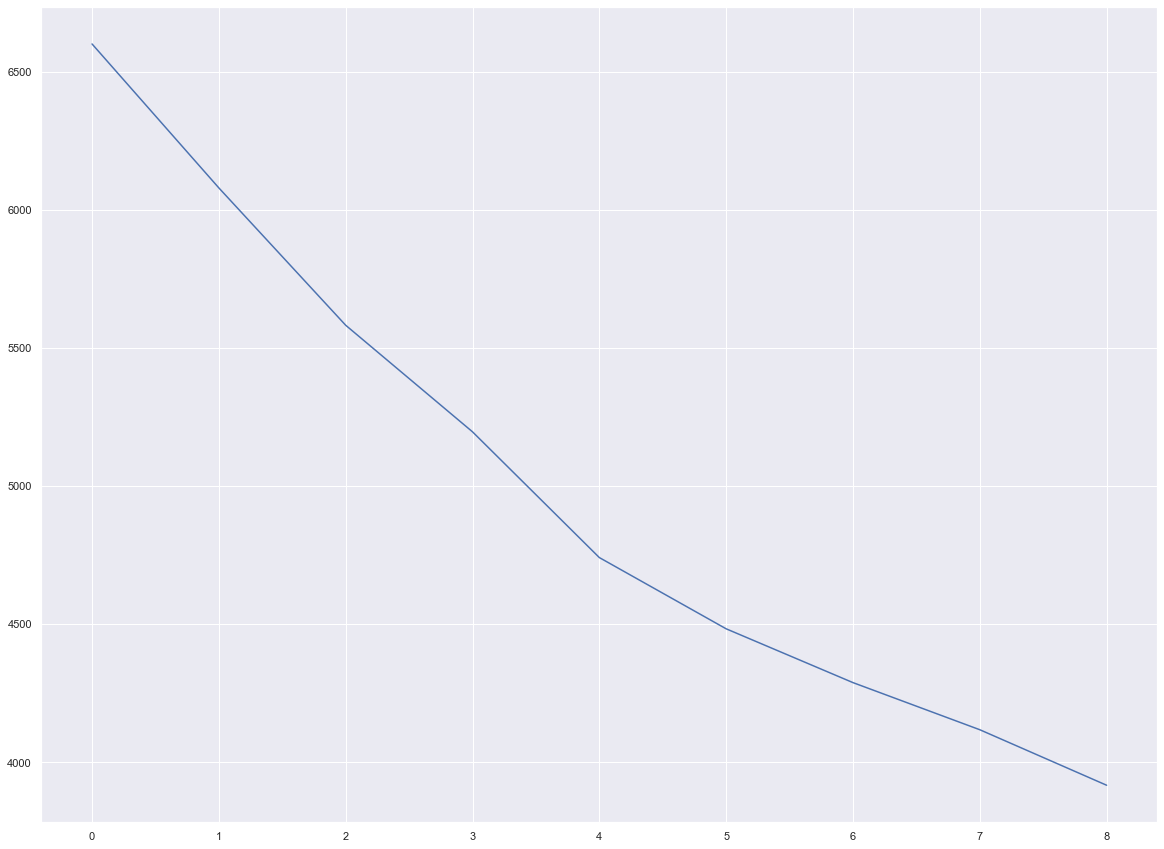

In [99]:
import matplotlib.pyplot as plt
plt.plot(historique_distortion)

In [100]:
for i,j in zip(historique_labels_count,historique_distortion):
    print('Avec  {} cluster  on détecte une distortion de {} '.format(i,j))

Avec  1 cluster  on détecte une distortion de 6600.000000000002 
Avec  2 cluster  on détecte une distortion de 6078.914446828783 
Avec  3 cluster  on détecte une distortion de 5581.920048165414 
Avec  4 cluster  on détecte une distortion de 5196.16981235355 
Avec  5 cluster  on détecte une distortion de 4741.045829180219 
Avec  6 cluster  on détecte une distortion de 4483.196440110669 
Avec  7 cluster  on détecte une distortion de 4288.45397653932 
Avec  8 cluster  on détecte une distortion de 4117.910732111844 
Avec  9 cluster  on détecte une distortion de 3916.9853603192178 


In [101]:
cluster_single = AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage='ward').fit(X)

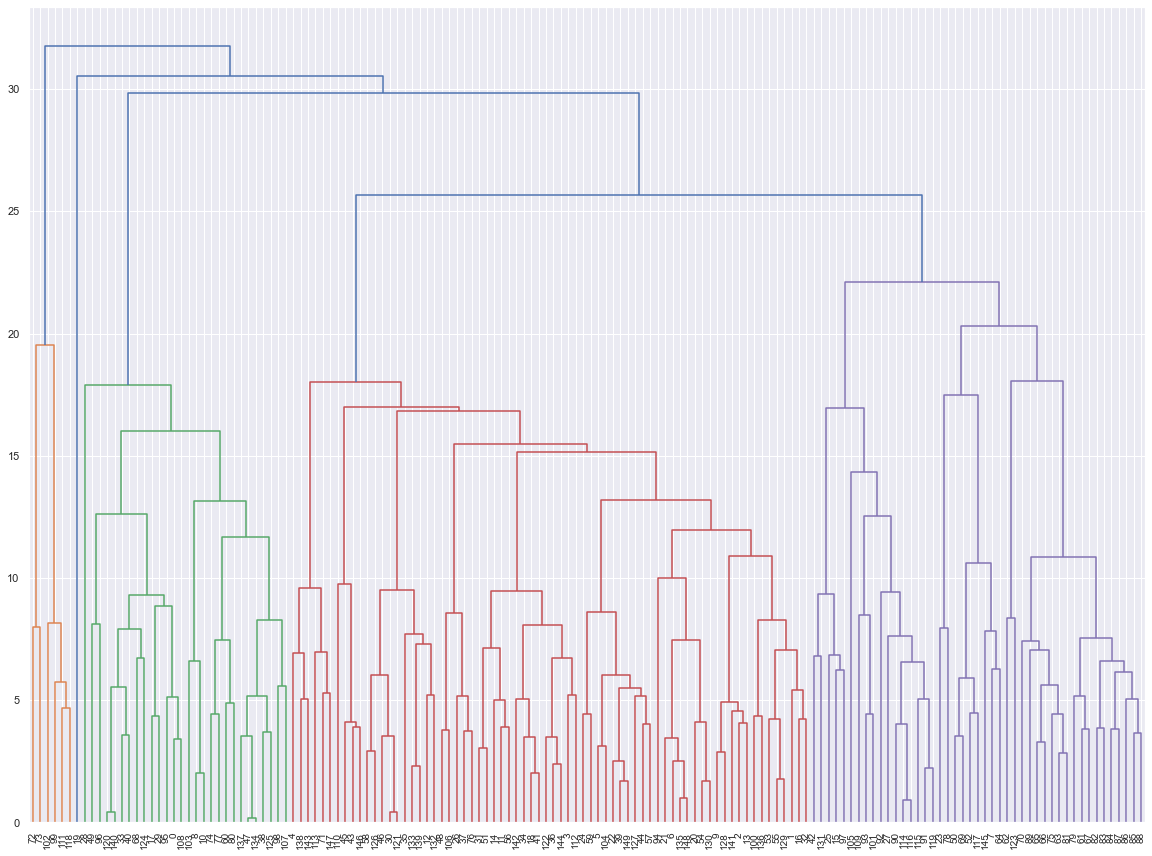

In [102]:
plot_dendrogram(cluster_single, truncate_mode = 'level',leaf_font_size=10)

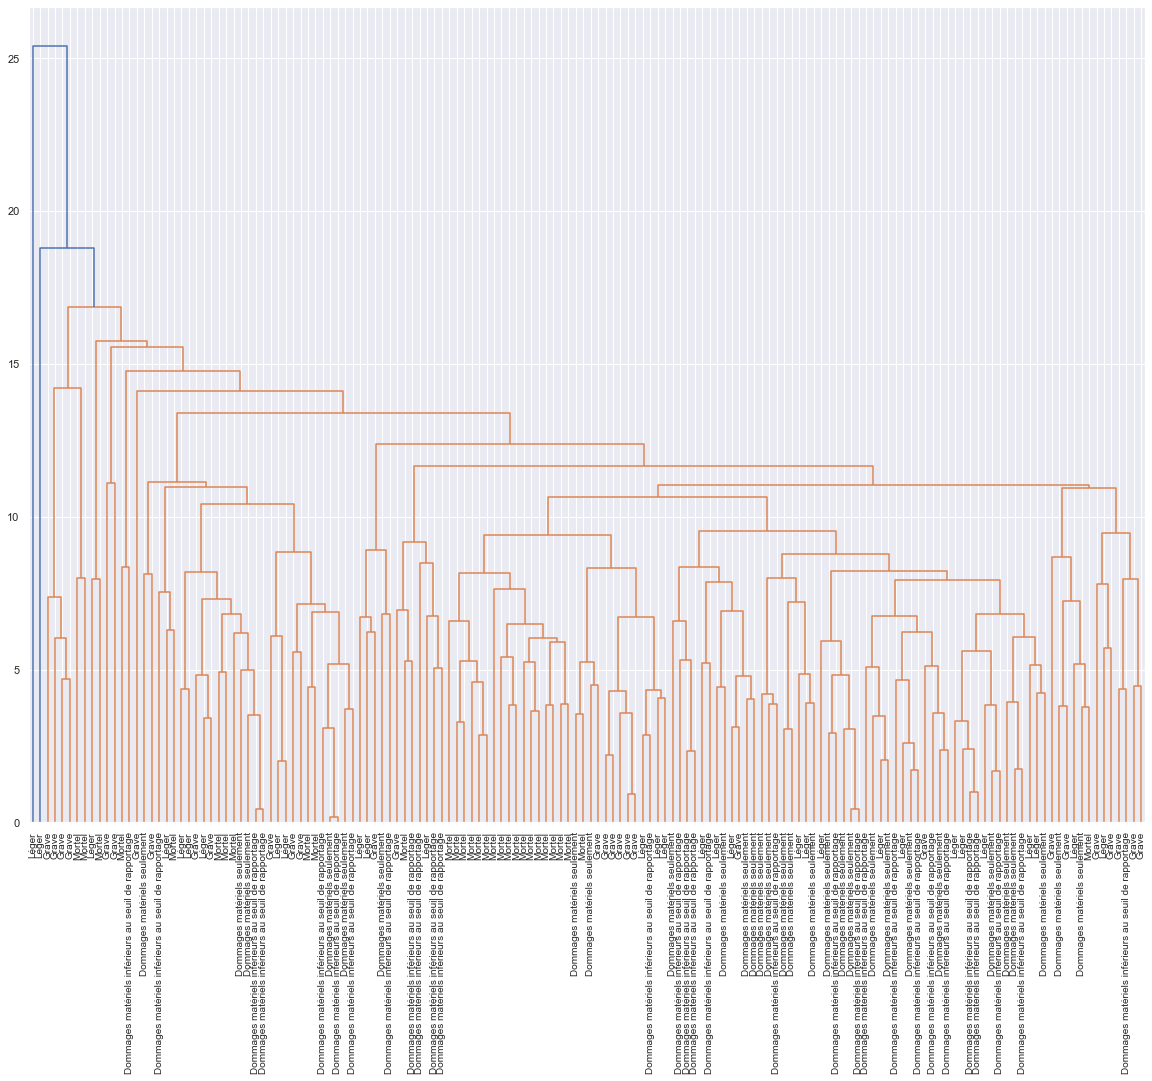

In [108]:
plot_dendrogram(cluster_single, truncate_mode = 'level',labels =label_gravite.values,leaf_font_size=10)

In [106]:
cluster_single = AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage='complete').fit(X)

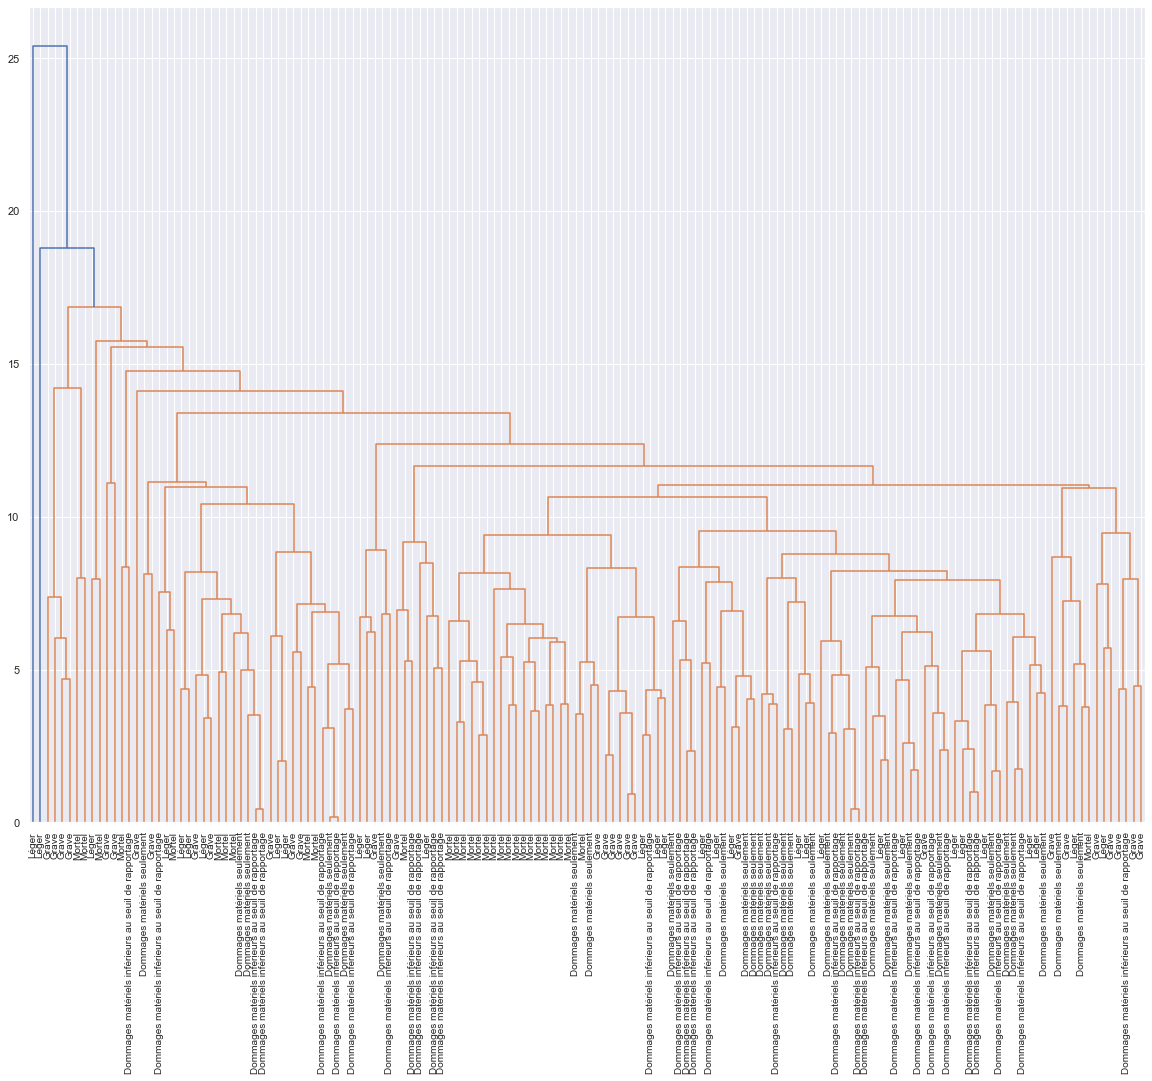

In [107]:
plot_dendrogram(cluster_single, truncate_mode = 'level',labels =label_gravite.values ,leaf_font_size=10)

In [104]:
cluster_single = AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage='single').fit(X)

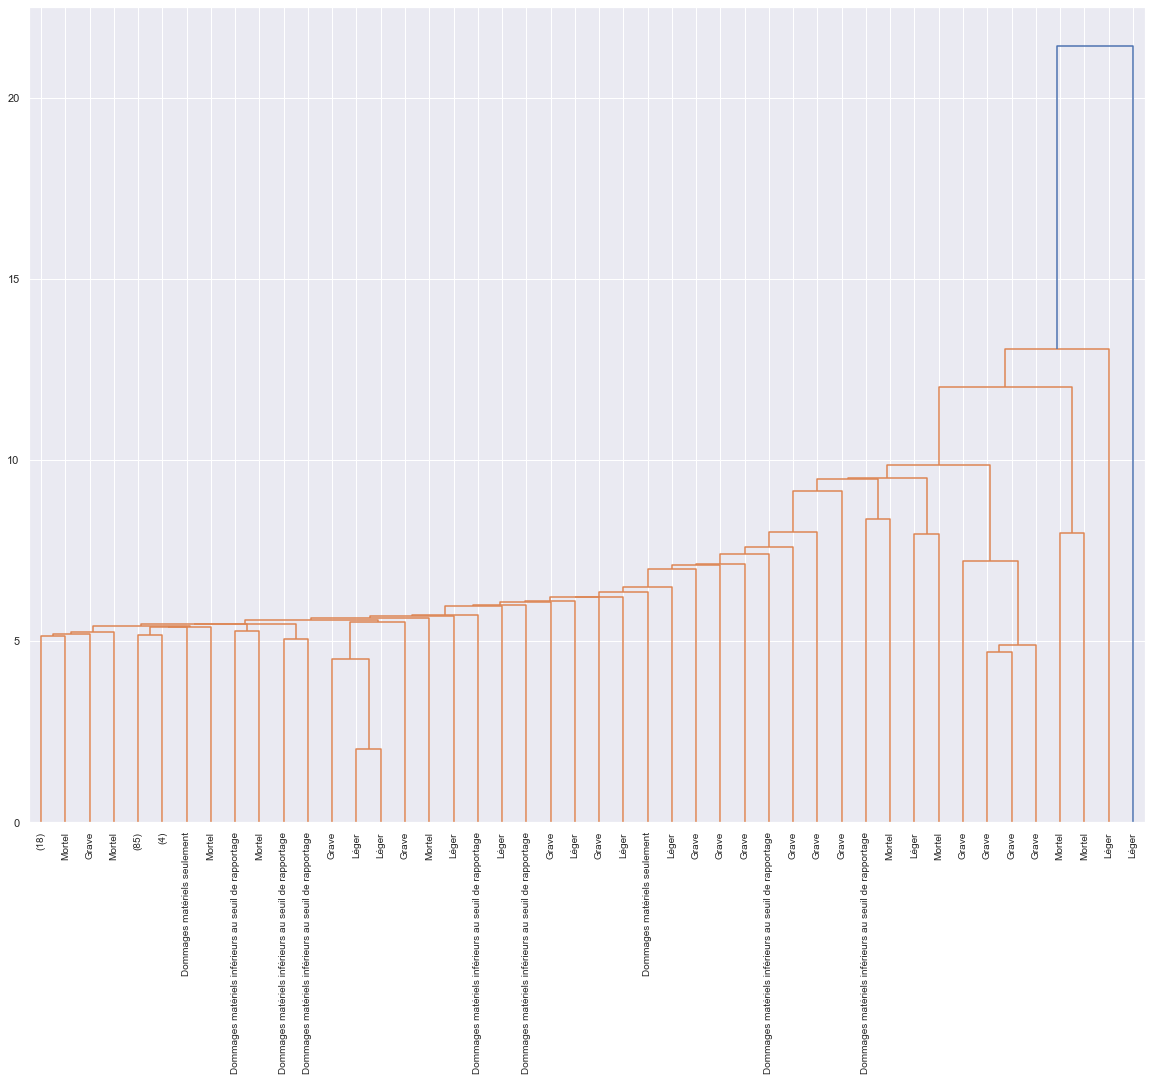

In [105]:
plot_dendrogram(cluster_single, truncate_mode = 'level',labels =label_gravite.values ,leaf_font_size=10)

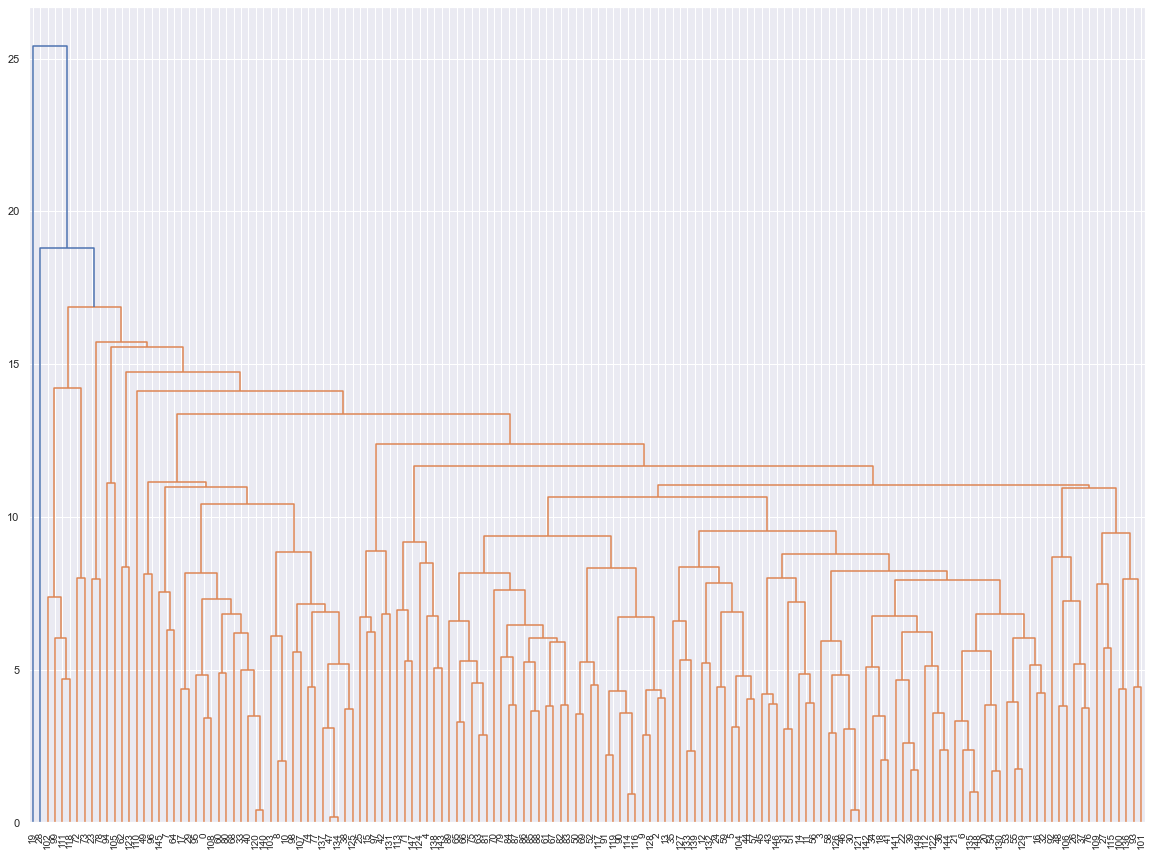

In [109]:
plot_dendrogram(cluster_single, truncate_mode = 'level',leaf_font_size=10)

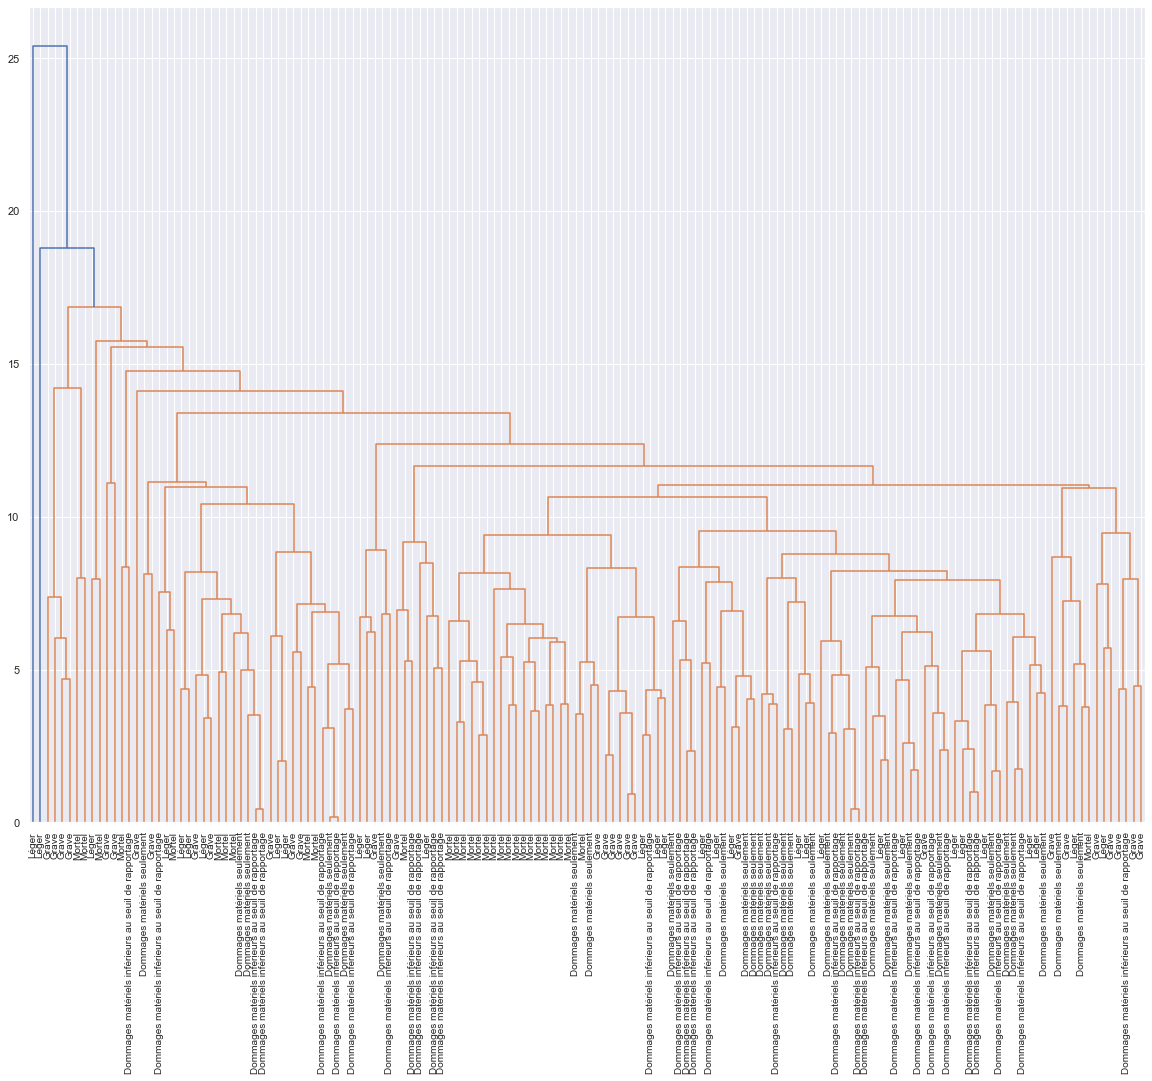

In [110]:
plot_dendrogram(cluster_single, truncate_mode = 'level',labels =label_gravite.values,leaf_font_size=10)

### B- Simulation avec lune partie de la trame des données  (230 échantillon, nb_sample_nu_type = 50 et 30 pour la derniere trame)


In [111]:
accident2019_Mtl_50_samples_each_type_gravite = pd.concat(DataSampleToSimulate(50,50,50,50,30))

Le nombre des observations des accidents de type léger aprés échantillonnage 50
Le nombre des observations des accidents avec Dommages_mat_seul 50
Le nombre des observations des accidents avec Dommages_matériels_inf_seuil_rapportage 50
Le nombre des observations des accidents considérés grave 50
Le nombre des observations des accidents considérés mortels 30


In [113]:
label_gravite = accident2019_Mtl_50_samples_each_type_gravite['gravite']

accident2019_Mtl_50_samples_each_type_gravite = accident2019_Mtl_50_samples_each_type_gravite.drop('gravite',1)

KeyError: 'gravite'

In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.cluster import KMeans
X = pd.get_dummies(accident2019_Mtl_50_samples_each_type_gravite)
#accident2019_Montreal2_sample_dummies = pd.get_dummies(accident2019_Montreal2_sample)
X = scaler.fit_transform(X)
historique_distortion = []
historique_labels_count = []


for k in range(1,10):
    kmeans = KMeans(n_clusters=k, n_init = 100).fit(X)
    #kmeans = KMeans(n_clusters=f, init='kmeans++').fit(accident2019_Montreal2)
    historique_distortion.append(kmeans.inertia_)
    historique_labels_count.append(k)

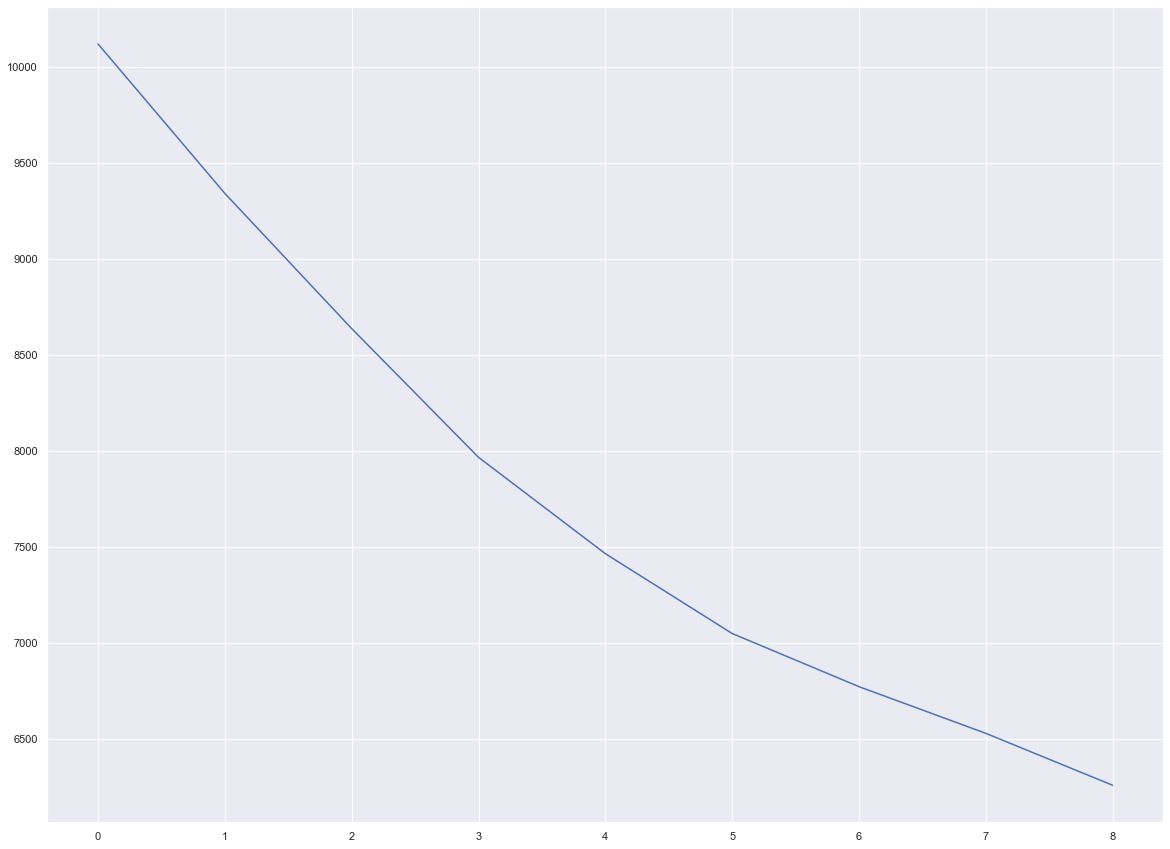

In [115]:
import matplotlib.pyplot as plt
plt.plot(historique_distortion)

In [116]:
for i,j in zip(historique_labels_count,historique_distortion):
    print('Avec  {} cluster  on détecte une distortion de {} '.format(i,j))

Avec  1 cluster  on détecte une distortion de 10119.999999999995 
Avec  2 cluster  on détecte une distortion de 9341.589340274866 
Avec  3 cluster  on détecte une distortion de 8637.54013469585 
Avec  4 cluster  on détecte une distortion de 7967.179716980848 
Avec  5 cluster  on détecte une distortion de 7465.227209506843 
Avec  6 cluster  on détecte une distortion de 7049.454042788253 
Avec  7 cluster  on détecte une distortion de 6772.627859821373 
Avec  8 cluster  on détecte une distortion de 6529.512673440327 
Avec  9 cluster  on détecte une distortion de 6259.09801928003 


## Sans étiquette 

In [117]:
cluster_single = AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage='single').fit(X)

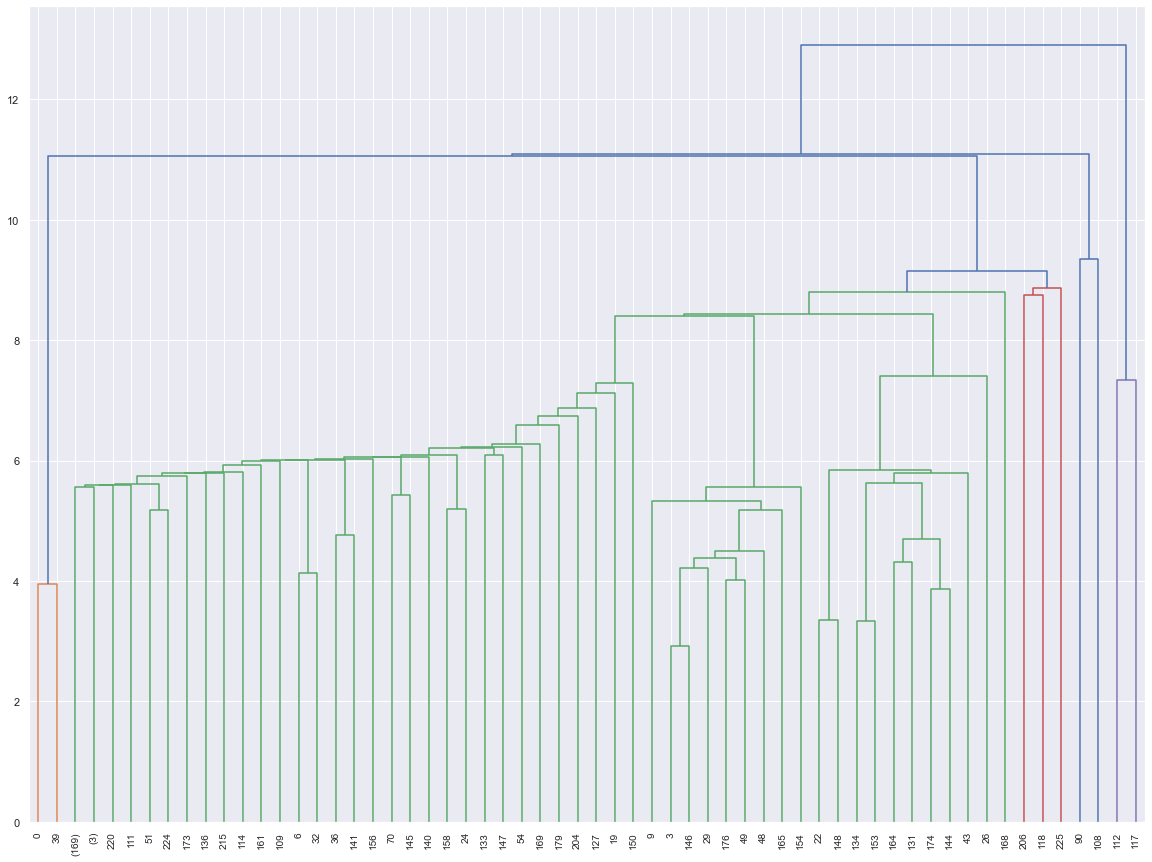

In [118]:
plot_dendrogram(cluster_single, truncate_mode = 'level',leaf_font_size=10)

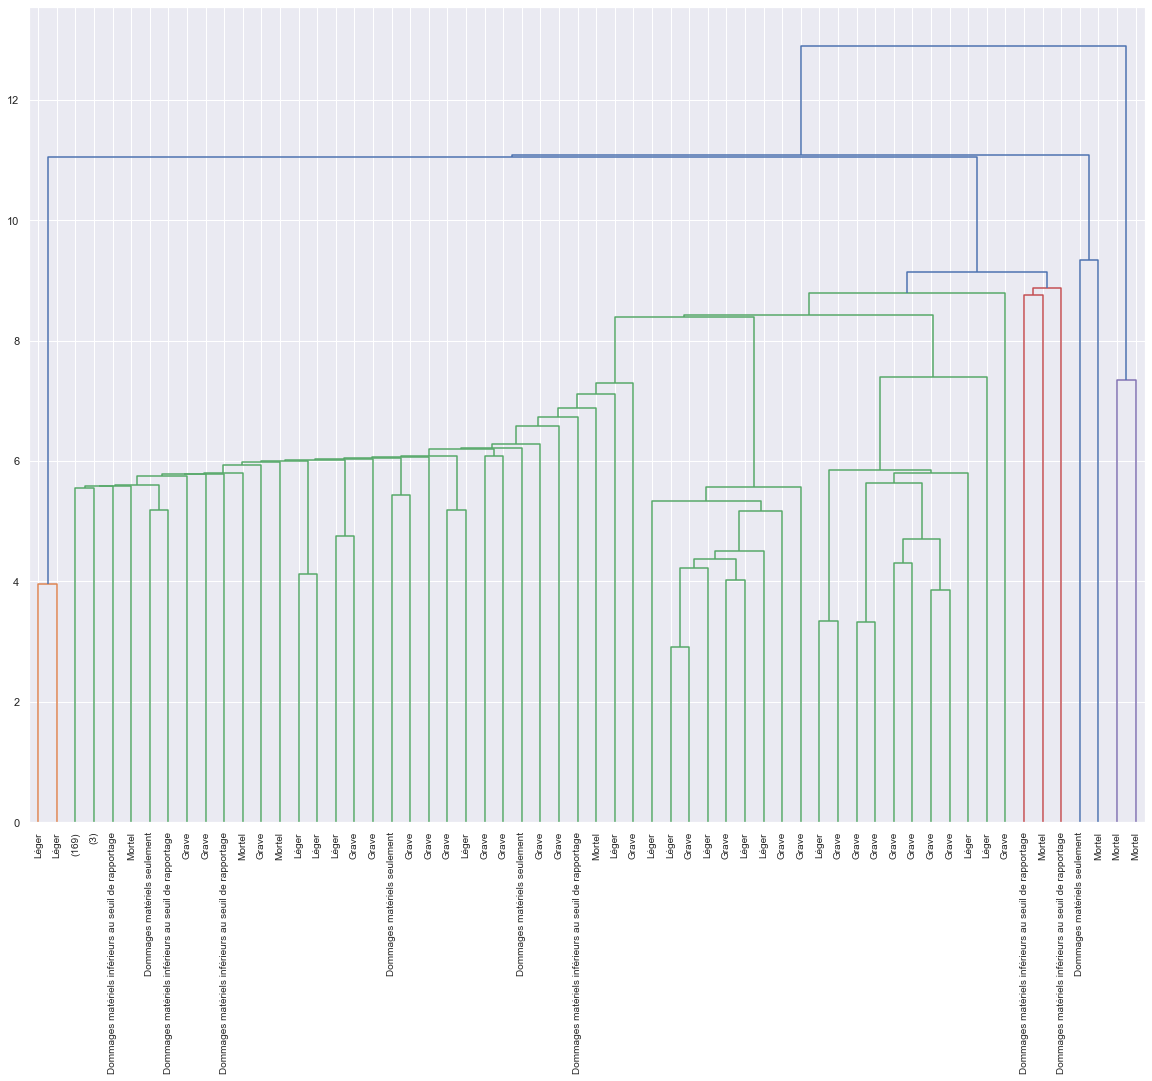

In [119]:
plot_dendrogram(cluster_single, truncate_mode = 'level',labels =label_gravite.values ,leaf_font_size=10)

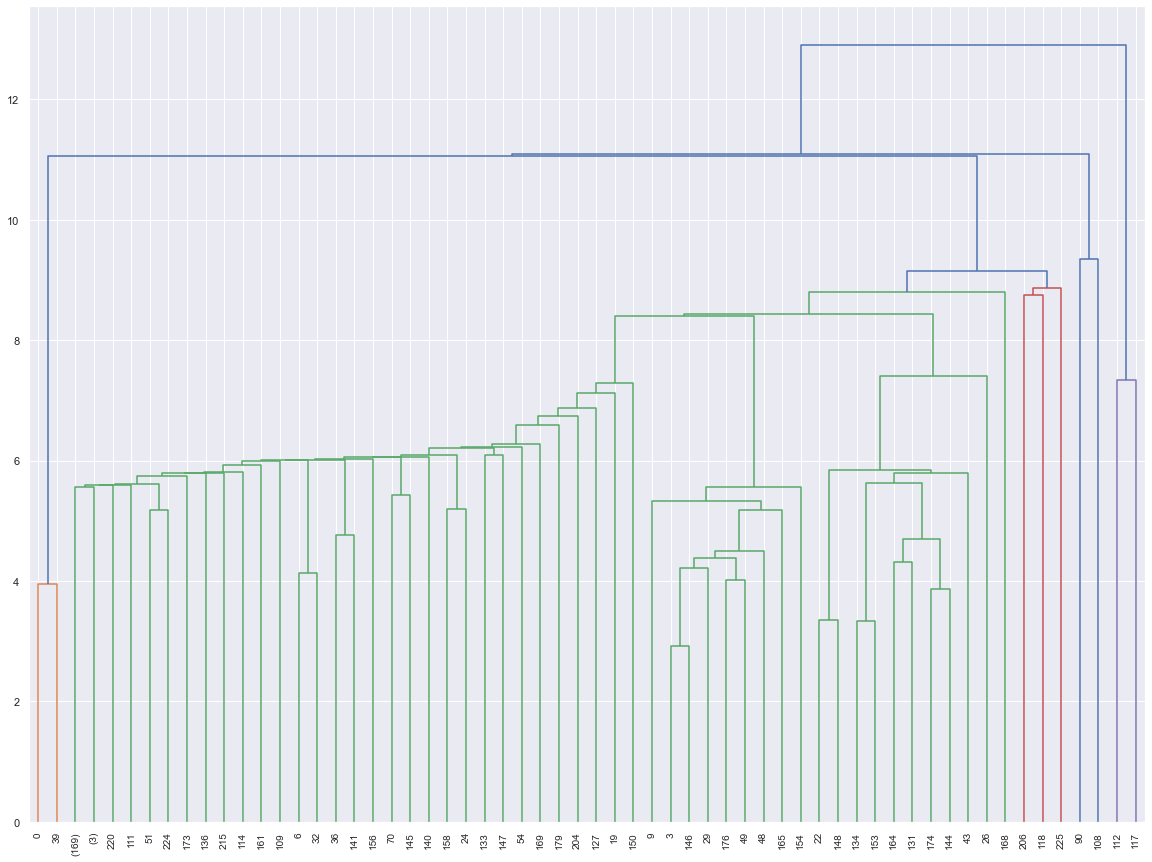

In [124]:
plot_dendrogram(cluster_single, truncate_mode = 'level',leaf_font_size=10)

In [122]:
cluster_Ward = AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage='ward').fit(X)

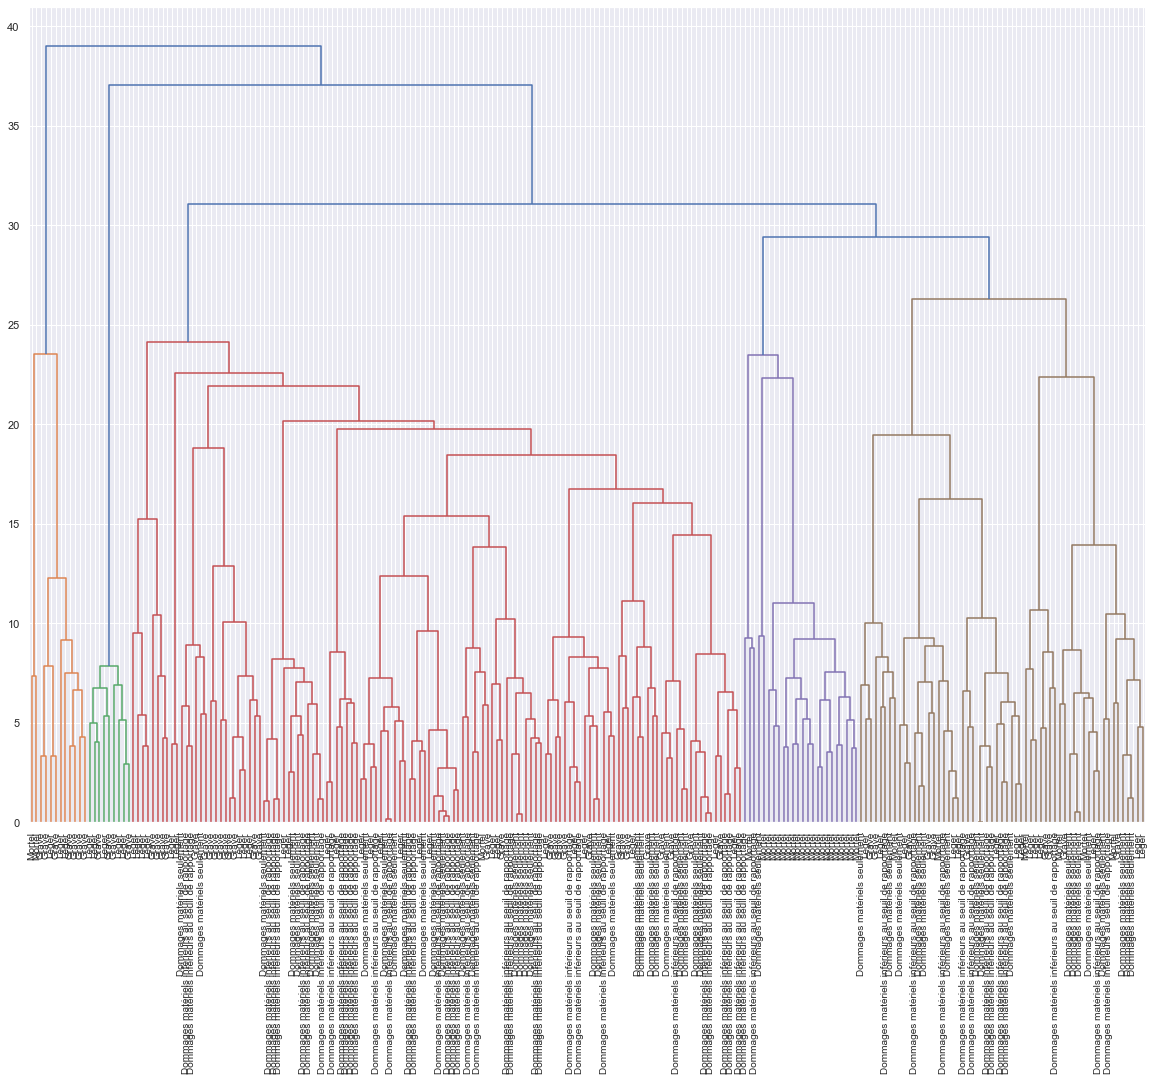

In [123]:
plot_dendrogram(cluster_Ward, truncate_mode = 'level',labels =label_gravite.values ,leaf_font_size=10)

In [125]:
cluster_complete = AgglomerativeClustering(distance_threshold=0,n_clusters=None,linkage='complete').fit(X)

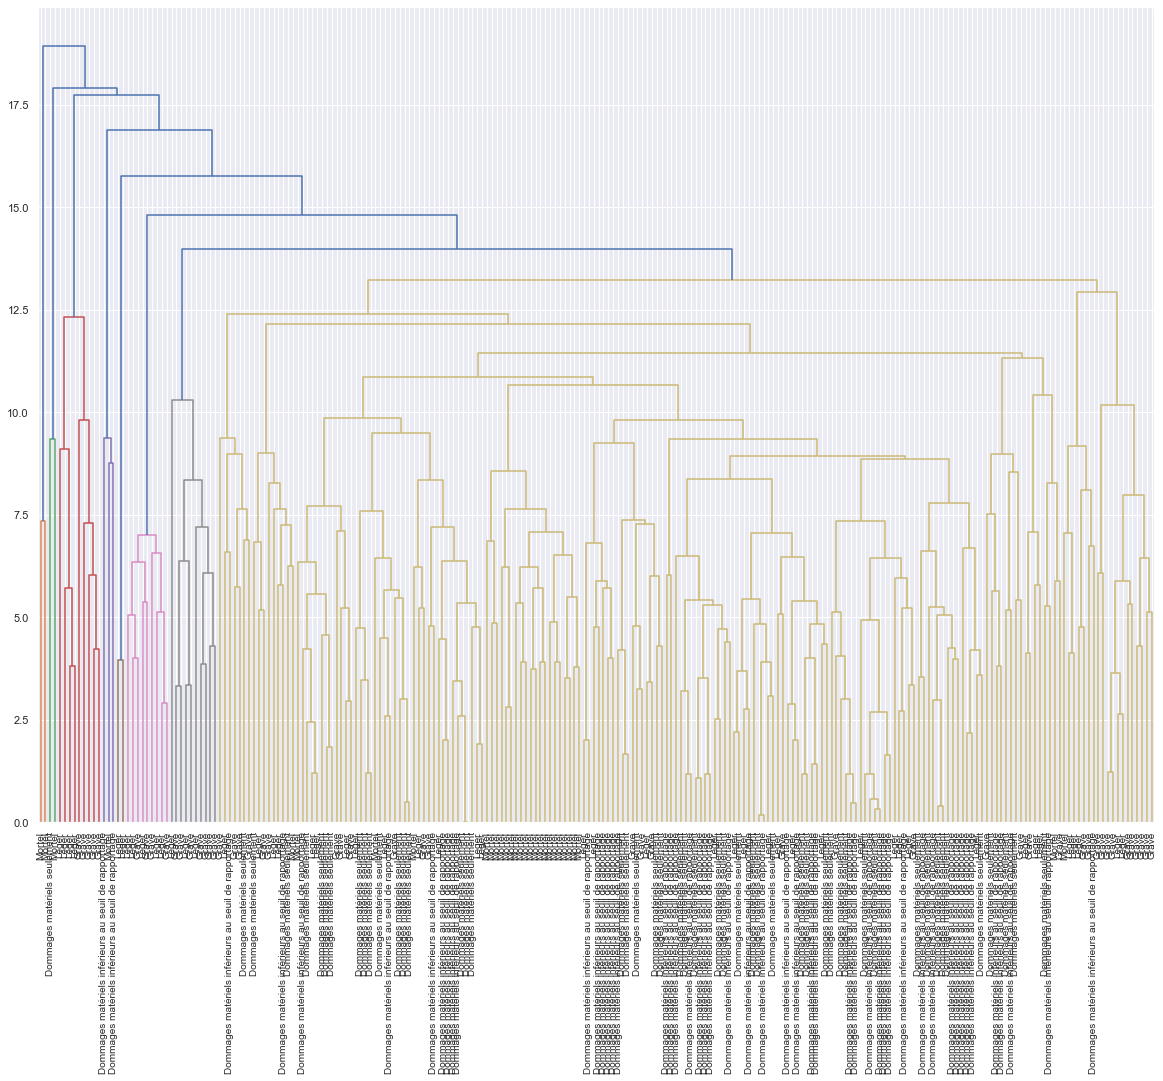

In [126]:
plot_dendrogram(cluster_complete, truncate_mode = 'level',labels =label_gravite.values ,leaf_font_size=10)

# Réduction de la dimentionalité en utilisant le PCA

##### Référence link: https://prutor.ai/implementing-agglomerative-clustering-using-sklearn/

In [131]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [132]:

##Preprocessing the data
X = pd.get_dummies(accident2019_Mtl_sample_all_Data)
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
#Reducing the dimensionality of the Data

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
#Dendograms are used to divide a given cluster into many different clusters.

## Pour K = 2

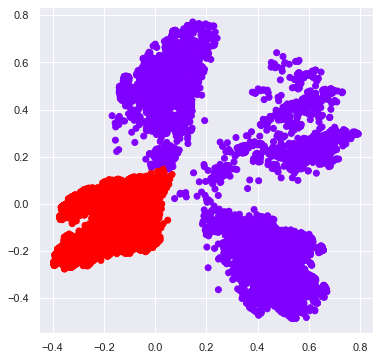

In [133]:
ac2 = AgglomerativeClustering(n_clusters = 2)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

## Pour K = 3

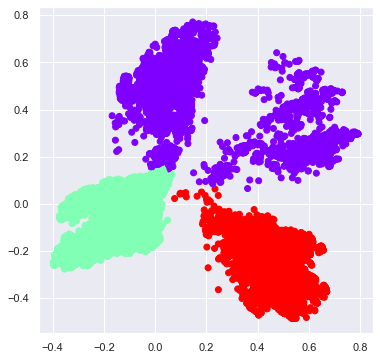

In [134]:
ac3 = AgglomerativeClustering(n_clusters = 3)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

## Pour K = 4

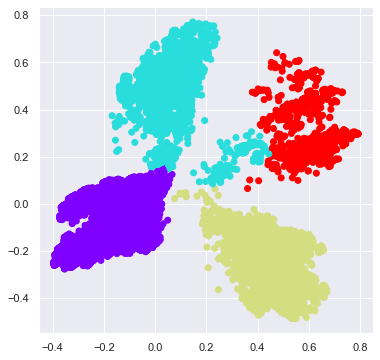

In [136]:
ac4 = AgglomerativeClustering(n_clusters = 4)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

## Pour K = 5

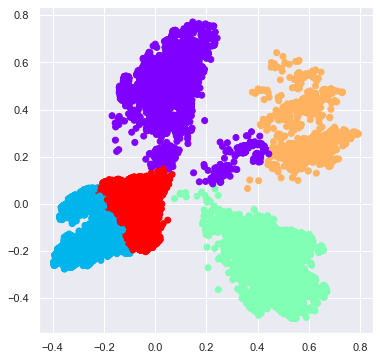

In [137]:
ac5 = AgglomerativeClustering(n_clusters = 5)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

## Pour K = 6

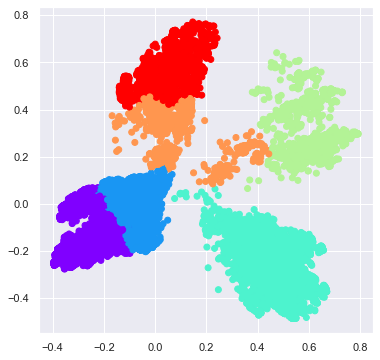

In [138]:
ac6 = AgglomerativeClustering(n_clusters = 6)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

## Pour K = 7

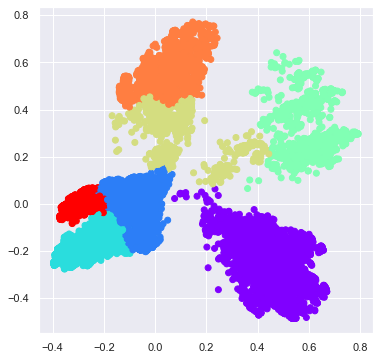

In [139]:
ac7 = AgglomerativeClustering(n_clusters = 7)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac7.fit_predict(X_principal), cmap ='rainbow')
plt.show()

## Pour K = 8

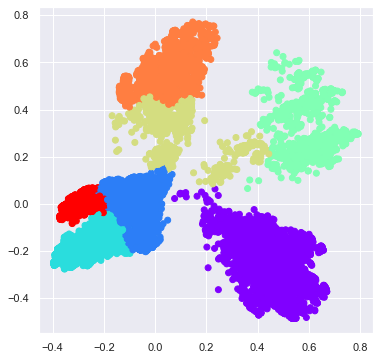

In [140]:
ac8 = AgglomerativeClustering(n_clusters = 7)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac8.fit_predict(X_principal), cmap ='rainbow')
plt.show()

## Évaluer  via le métrique les différents résultats du  modèles (selon les nombre de clustre K) et visualiser les résultats

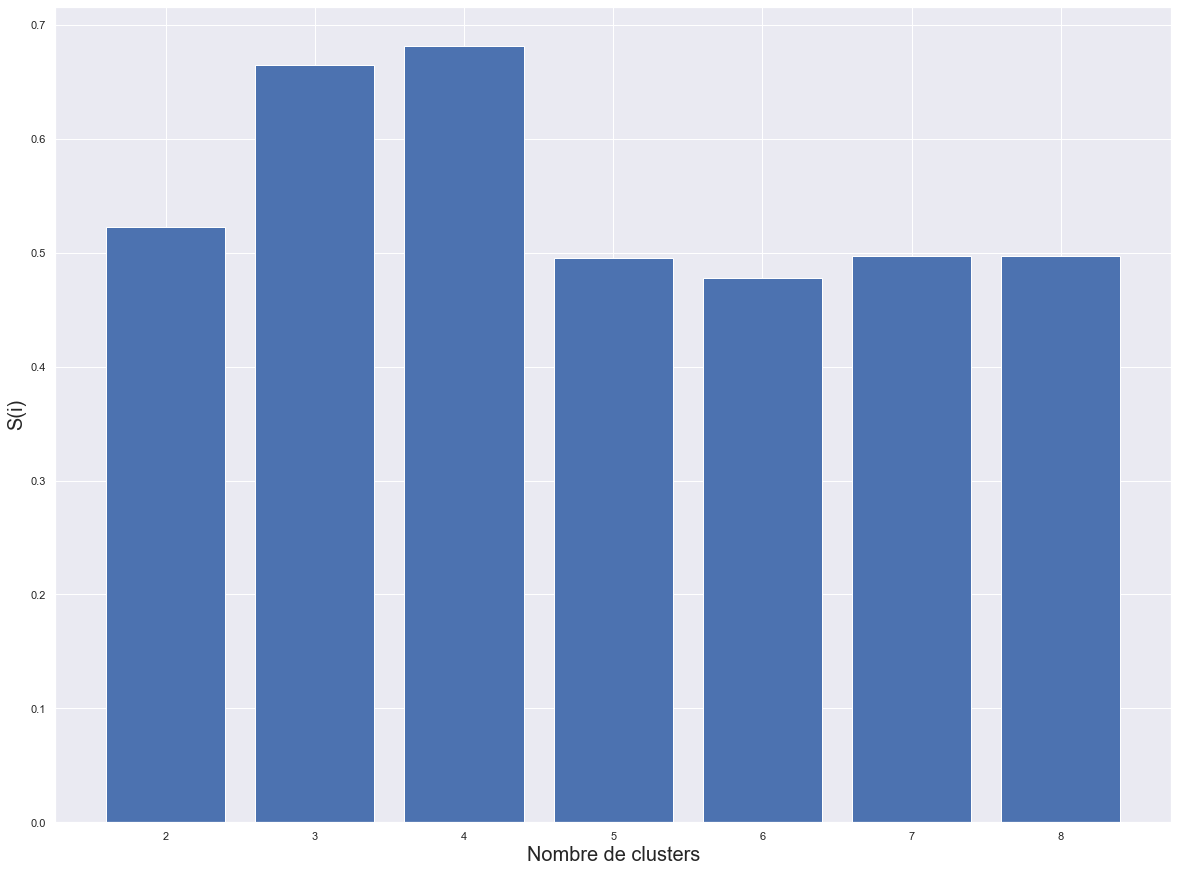

In [141]:
k = [2, 3, 4, 5, 6,7,8]
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac7.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac8.fit_predict(X_principal)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Nombre de clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

## Simulation avec lune partie de la trame des données (4170 échantillon, nb_sample_nu_type = 1000, 140 et 30 pour la derniere trame)


In [142]:
accident2019_Mtl_1000_sample = pd.concat(DataSampleToSimulate(1000,1000,1000,140,30))

Le nombre des observations des accidents de type léger aprés échantillonnage 1000
Le nombre des observations des accidents avec Dommages_mat_seul 1000
Le nombre des observations des accidents avec Dommages_matériels_inf_seuil_rapportage 1000
Le nombre des observations des accidents considérés grave 140
Le nombre des observations des accidents considérés mortels 30


In [150]:
##Preprocessing the data
X = pd.get_dummies(accident2019_Mtl_1000_sample)
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
#Reducing the dimensionality of the Data

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
#Dendograms are used to divide a given cluster into many different clusters.

## K = 2

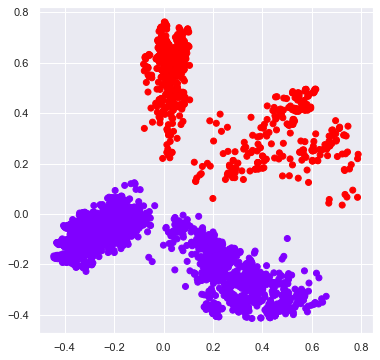

In [151]:
ac2 = AgglomerativeClustering(n_clusters = 2)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = ac2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

## Pour K = 3

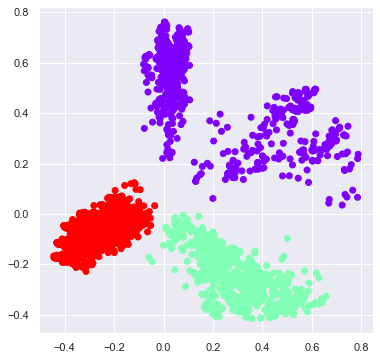

In [152]:
ac3 = AgglomerativeClustering(n_clusters = 3)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac3.fit_predict(X_principal), cmap ='rainbow')
plt.show()

## Pour K = 4

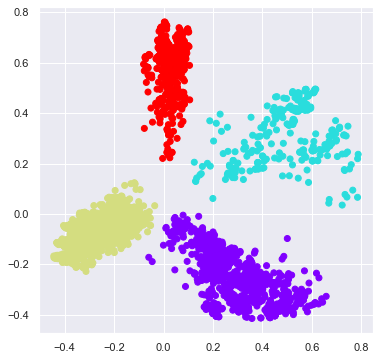

In [153]:
ac4 = AgglomerativeClustering(n_clusters = 4)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac4.fit_predict(X_principal), cmap ='rainbow')
plt.show()

## Pour K = 5

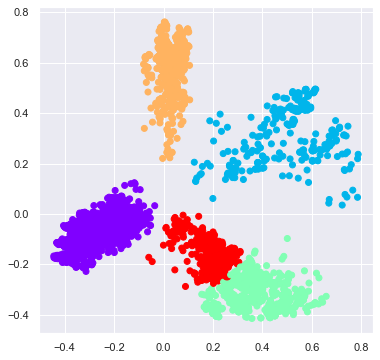

In [154]:
ac5 = AgglomerativeClustering(n_clusters = 5)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac5.fit_predict(X_principal), cmap ='rainbow')
plt.show()

## Pour K = 6

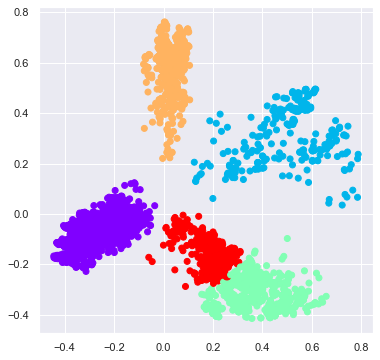

In [155]:
ac6 = AgglomerativeClustering(n_clusters = 5)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

## Pour K = 7

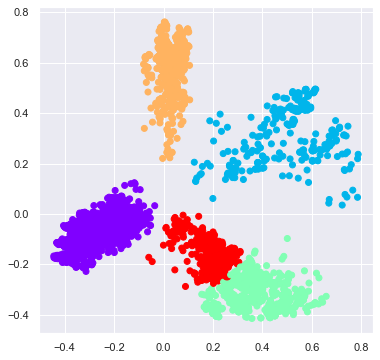

In [156]:
ac7 = AgglomerativeClustering(n_clusters = 5)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac7.fit_predict(X_principal), cmap ='rainbow')
plt.show()

## Pour K = 8

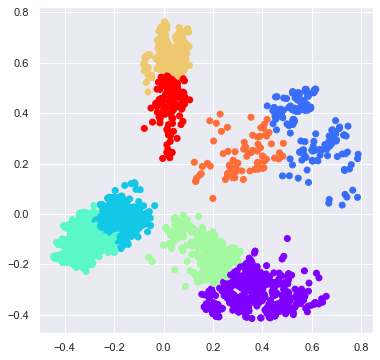

In [157]:
ac8 = AgglomerativeClustering(n_clusters = 8)
  
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'], 
           c = ac8.fit_predict(X_principal), cmap ='rainbow')
plt.show()

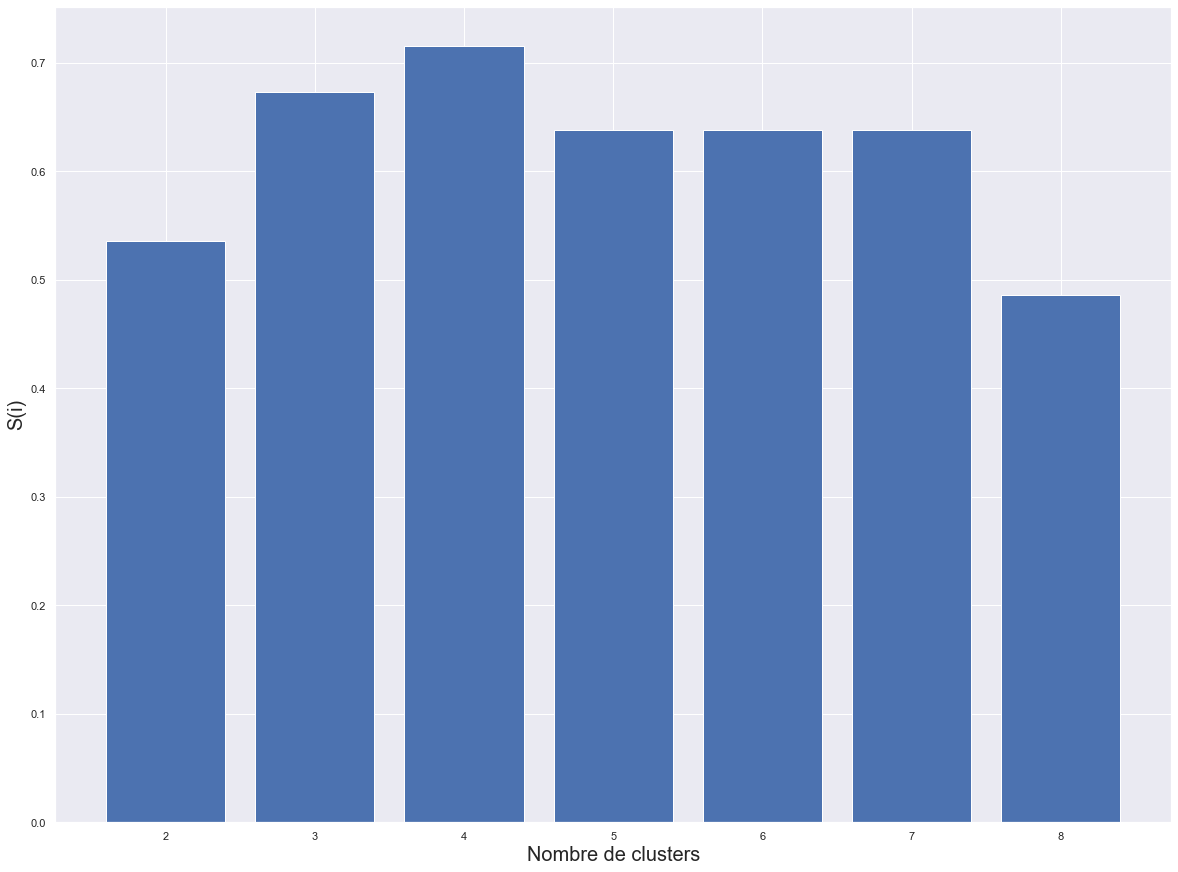

In [158]:
k = [2, 3, 4, 5, 6,7,8]
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X_principal, ac2.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac3.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac4.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac5.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac6.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac7.fit_predict(X_principal)))
silhouette_scores.append(
        silhouette_score(X_principal, ac8.fit_predict(X_principal)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Nombre de clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

** Fin démonstration :) **